# EDA

In [1]:
import pandas as pd

## Future Unseen Examples

In [2]:
df_ftr_unseen = pd.read_csv("../data/future_unseen_examples.csv") 

### Features description

- **bedrooms**: Number of bedrooms in the home.
- **bathrooms**: Number of bathrooms in the home, including half baths represented as fractional values.
- **sqft_living**: Square footage of the home's interior living space.
- **sqft_lot**: Square footage of the land space on which the home is built.
- **floors**: Total number of floors (levels) in the home.
- **waterfront**: Indicates if the property has a waterfront (1) or not (0).
- **view**: An index rating from 0 to 4 that indicates the quality of the property view.
- **condition**: An index from 1 to 5 indicating the condition of the home, where 1 is poor and 5 is excellent.
- **grade**: An index based on the King County grading system, assessing the construction quality of improvements. Grades range from 1 to 13, where 7 is average.
- **sqft_above**: Square footage of house space that is above ground level.
- **sqft_basement**: Square footage of the basement area.
- **yr_built**: The year in which the house was originally built.
- **yr_renovated**: The year in which the house was last renovated. A 0 indicates no renovations.
- **zipcode**: The ZIP code in which the house is located.
- **lat**: The latitude of the property location.
- **long**: The longitude of the property location.
- **sqft_living15**: The square footage of interior living space for the nearest 15 neighbors.
- **sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors, offering an average neighborhood lot size.

#### Why is "bathrooms" feature a float?

**Half and Quarter Baths**: A full bathroom consists of four components: a toilet, sink, bathtub, and shower. However, bathrooms that don't have all four components are often counted as fractions of a bathroom in property listings. For example:

- A **half bath** (or powder room) typically includes only a toilet and sink. This is often represented as 0.5 bathrooms.
- A **three-quarter** bath may include a toilet, sink, and shower but no bathtub, sometimes counted as 0.75 bathrooms.
- A **full bath** includes a toilet, sink, bathtub, and possibly a shower, counted as 1 bathroom.

#### Why is "floor" feature a float?

The floors feature being a float (decimal number) in real estate datasets often reflects architectural and design nuances in buildings that aren't strictly categorized by whole numbers of floors. Here are a few reasons why this might be the case:

- **Mezzanines and Split Levels**: Some homes have mezzanine levels or split-level designs that don't constitute a full additional floor but significantly impact the layout and functionality of the space. Representing floors as a float allows for a more accurate description of such structures.

- **Partial Floors**: In some cases, buildings might have floors that only extend over part of the building's footprint, such as a half-floor that sits atop a taller ground floor. These are not full stories but add to the total floor count in a way that isn't accurately captured by integers.

**Lofts and High Ceilings**: Properties with lofts or exceptionally high ceilings might be classified in a way that reflects their extra space without being considered a full additional floor, particularly in marketing materials to highlight the spaciousness of a property.

Overall, while floors are typically thought of in whole numbers, the use of floats allows for a finer-grained representation of a property's layout and design characteristics, especially in datasets aiming to capture a wide variety of property types.

#### Zero represent properties that haven't been restored at "yr_renovated" feature


Using 0 to represent properties that have never been renovated in the yr_renovated field can be practical for keeping the dataset simple and straightforward. However, this approach has a significant downside for machine learning models: it introduces a potential bias. Specifically, the value 0, which is far from any actual year, could distort the model's understanding of the data, particularly in regression or time-series analyses.

For **regression models** where the timing of renovations could be predictive (e.g., estimating property value), calculating the years since renovation or adjusting the yr_renovated field to a more neutral value might be more informative.
```
years_since_renovated = max(yr_built) - (yr_renovated OR yr_built if yr_renovated == 0)
```

In [3]:
dict(df_ftr_unseen.loc[1])

{'bedrooms': 3.0,
 'bathrooms': 2.5,
 'sqft_living': 2220.0,
 'sqft_lot': 6380.0,
 'floors': 1.5,
 'waterfront': 0.0,
 'view': 0.0,
 'condition': 4.0,
 'grade': 8.0,
 'sqft_above': 1660.0,
 'sqft_basement': 560.0,
 'yr_built': 1931.0,
 'yr_renovated': 0.0,
 'zipcode': 98115.0,
 'lat': 47.6974,
 'long': -122.313,
 'sqft_living15': 950.0,
 'sqft_lot15': 6380.0}

In [4]:
df_ftr_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       100 non-null    int64  
 1   bathrooms      100 non-null    float64
 2   sqft_living    100 non-null    int64  
 3   sqft_lot       100 non-null    int64  
 4   floors         100 non-null    float64
 5   waterfront     100 non-null    int64  
 6   view           100 non-null    int64  
 7   condition      100 non-null    int64  
 8   grade          100 non-null    int64  
 9   sqft_above     100 non-null    int64  
 10  sqft_basement  100 non-null    int64  
 11  yr_built       100 non-null    int64  
 12  yr_renovated   100 non-null    int64  
 13  zipcode        100 non-null    int64  
 14  lat            100 non-null    float64
 15  long           100 non-null    float64
 16  sqft_living15  100 non-null    int64  
 17  sqft_lot15     100 non-null    int64  
dtypes: float64(

### Summary Statistics

The dataset's summary statistics provide a comprehensive overview of the property features:

#### Key Points
- **Bedrooms**: The number of bedrooms ranges from 2 to 6, with an average of about 3.4, indicating a variety of property sizes.
- **Bathrooms**: Bathroom numbers vary between 1 and 4.5, with the mean at approximately 2.12, reflecting diverse home layouts.
- **sqft_living**: Living area sizes span from 750 to 4580 square feet, with an average size of 2012.47 sqft, showcasing a broad range of property sizes.
- **sqft_lot**: Lot sizes are quite varied, ranging from 1194 to 214750 square feet, highlighting the diversity in property land size.
- **Floors**: Properties have between 1 and 3 floors, with most homes featuring 1 to 2 floors, indicating typical residential designs.
- **Year Built (yr_built)**: The construction year of homes ranges widely from 1901 to 2015, showing a mix of historic and contemporary properties.

#### Observations
- The **condition** and **grade** metrics indicate a general good quality of the properties, with averages suggesting homes are well-maintained and of fair construction quality.
- Geographic features like **zipcode**, **lat**, and **long** indicate a wide distribution of properties, potentially reflecting diverse neighborhoods and living environments.

These statistics offer valuable insights into the types of properties within the dataset, highlighting a range of sizes, ages, and qualities. This diversity underscores the importance of detailed analysis for potential buyers, sellers, and real estate professionals.


In [5]:
df_ftr_unseen.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4       1.00         1680      5043     1.5           0     0   
1         3       2.50         2220      6380     1.5           0     0   
2         3       2.25         1630     10962     1.0           0     0   
3         5       2.50         1710      9720     2.0           0     0   
4         2       1.00          850      6370     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      6        1680              0      1911             0   
1          4      8        1660            560      1931             0   
2          4      8        1100            530      1977             0   
3          4      8        1710              0      1974             0   
4          3      6         850              0      1951             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98118  47.5354 -122.273           1560        5765  
1    98115  47.6974 -122.313            950        6380  
2    98030  47.3801 -122.166           1830        8470  
3    98005  47.5903 -122.157           2270        9672  
4    98126  47.5198 -122.373            850        5170

In [6]:
df_ftr_unseen.describe()

bedrooms   bathrooms  sqft_living       sqft_lot      floors  \
count  100.000000  100.000000   100.000000     100.000000  100.000000   
mean     3.420000    2.122500  2012.470000   13520.800000    1.570000   
std      0.843034    0.691301   781.045006   26498.880955    0.555141   
min      2.000000    1.000000   750.000000    1194.000000    1.000000   
25%      3.000000    1.750000  1445.000000    4990.000000    1.000000   
50%      3.000000    2.250000  1845.000000    7324.000000    1.500000   
75%      4.000000    2.500000  2447.500000    9997.000000    2.000000   
max      6.000000    4.500000  4580.000000  214750.000000    3.000000   

       waterfront        view   condition       grade   sqft_above  \
count      100.00  100.000000  100.000000  100.000000   100.000000   
mean         0.01    0.170000    3.430000    7.610000  1815.770000   
std          0.10    0.697108    0.639681    1.118215   773.339079   
min          0.00    0.000000    3.000000    5.000000   750.000000   
25%          0.00    0.000000    3.000000    7.000000  1247.500000   
50%          0.00    0.000000    3.000000    7.000000  1660.000000   
75%          0.00    0.000000    4.000000    8.000000  2300.000000   
max          1.00    4.000000    5.000000   10.000000  4580.000000   

       sqft_basement     yr_built  yr_renovated       zipcode         lat  \
count     100.000000   100.000000    100.000000    100.000000  100.000000   
mean      196.700000  1974.670000     59.780000  98069.750000   47.524272   
std       346.454058    28.767285    341.642041     52.881108    0.142476   
min         0.000000  1901.000000      0.000000  98001.000000   47.209300   
25%         0.000000  1956.750000      0.000000  98030.000000   47.398075   
50%         0.000000  1977.000000      0.000000  98056.000000   47.526050   
75%       300.000000  1999.250000      0.000000  98108.250000   47.647325   
max      1460.000000  2015.000000   2009.000000  98199.000000   47.774800   

             long  sqft_living15     sqft_lot15  
count  100.000000     100.000000     100.000000  
mean  -122.179270    1953.210000   12228.870000  
std      0.150811     636.705683   24282.112045  
min   -122.407000     850.000000    1217.000000  
25%   -122.300500    1517.500000    5151.750000  
50%   -122.170500    1845.000000    7346.000000  
75%   -122.077750    2385.000000   10153.750000  
max   -121.744000    3820.000000  212137.000000

#### Histograms

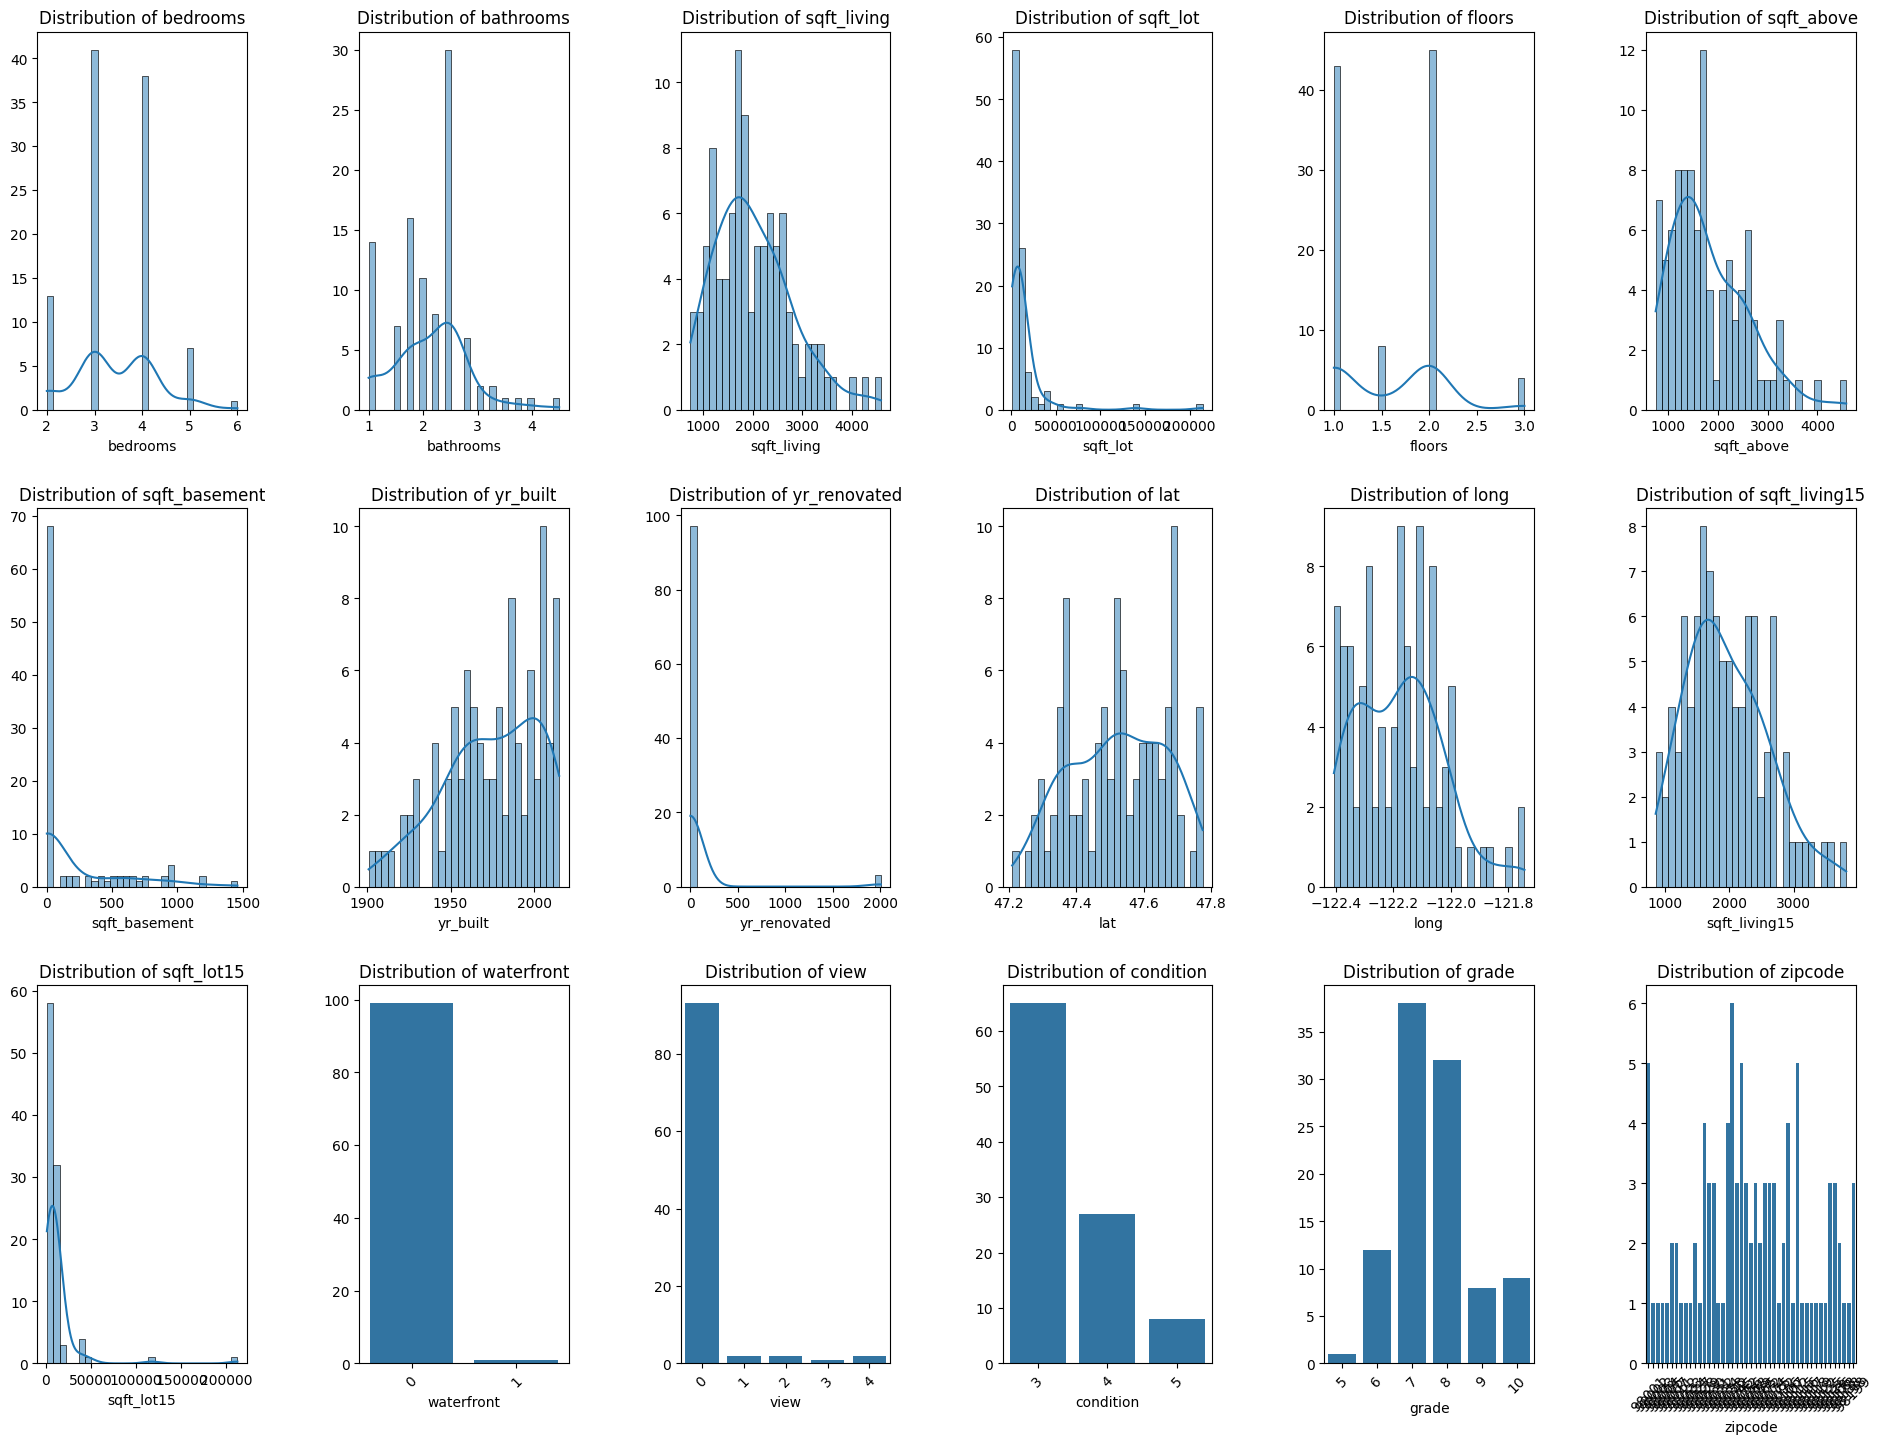

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = df_ftr_unseen

# List of numerical and categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
all_features = numerical_features + categorical_features

# Define the grid layout
n_rows, n_cols = 3, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Plot distribution for each feature
for i, feature in enumerate(all_features):
    if feature in numerical_features:
        sns.histplot(data[feature], kde=True, bins=30, ax=axes_flat[i])
    else:
        sns.countplot(x=data[feature], ax=axes_flat[i])
        for label in axes_flat[i].get_xticklabels():
            label.set_rotation(45)
    
    axes_flat[i].set_title(f'Distribution of {feature}')
    axes_flat[i].set_xlabel(feature)
    axes_flat[i].set_ylabel('')

# Hide any unused subplots
for ax in axes_flat[i+1:]:
    ax.axis('off')

plt.show()


#### Boxplots

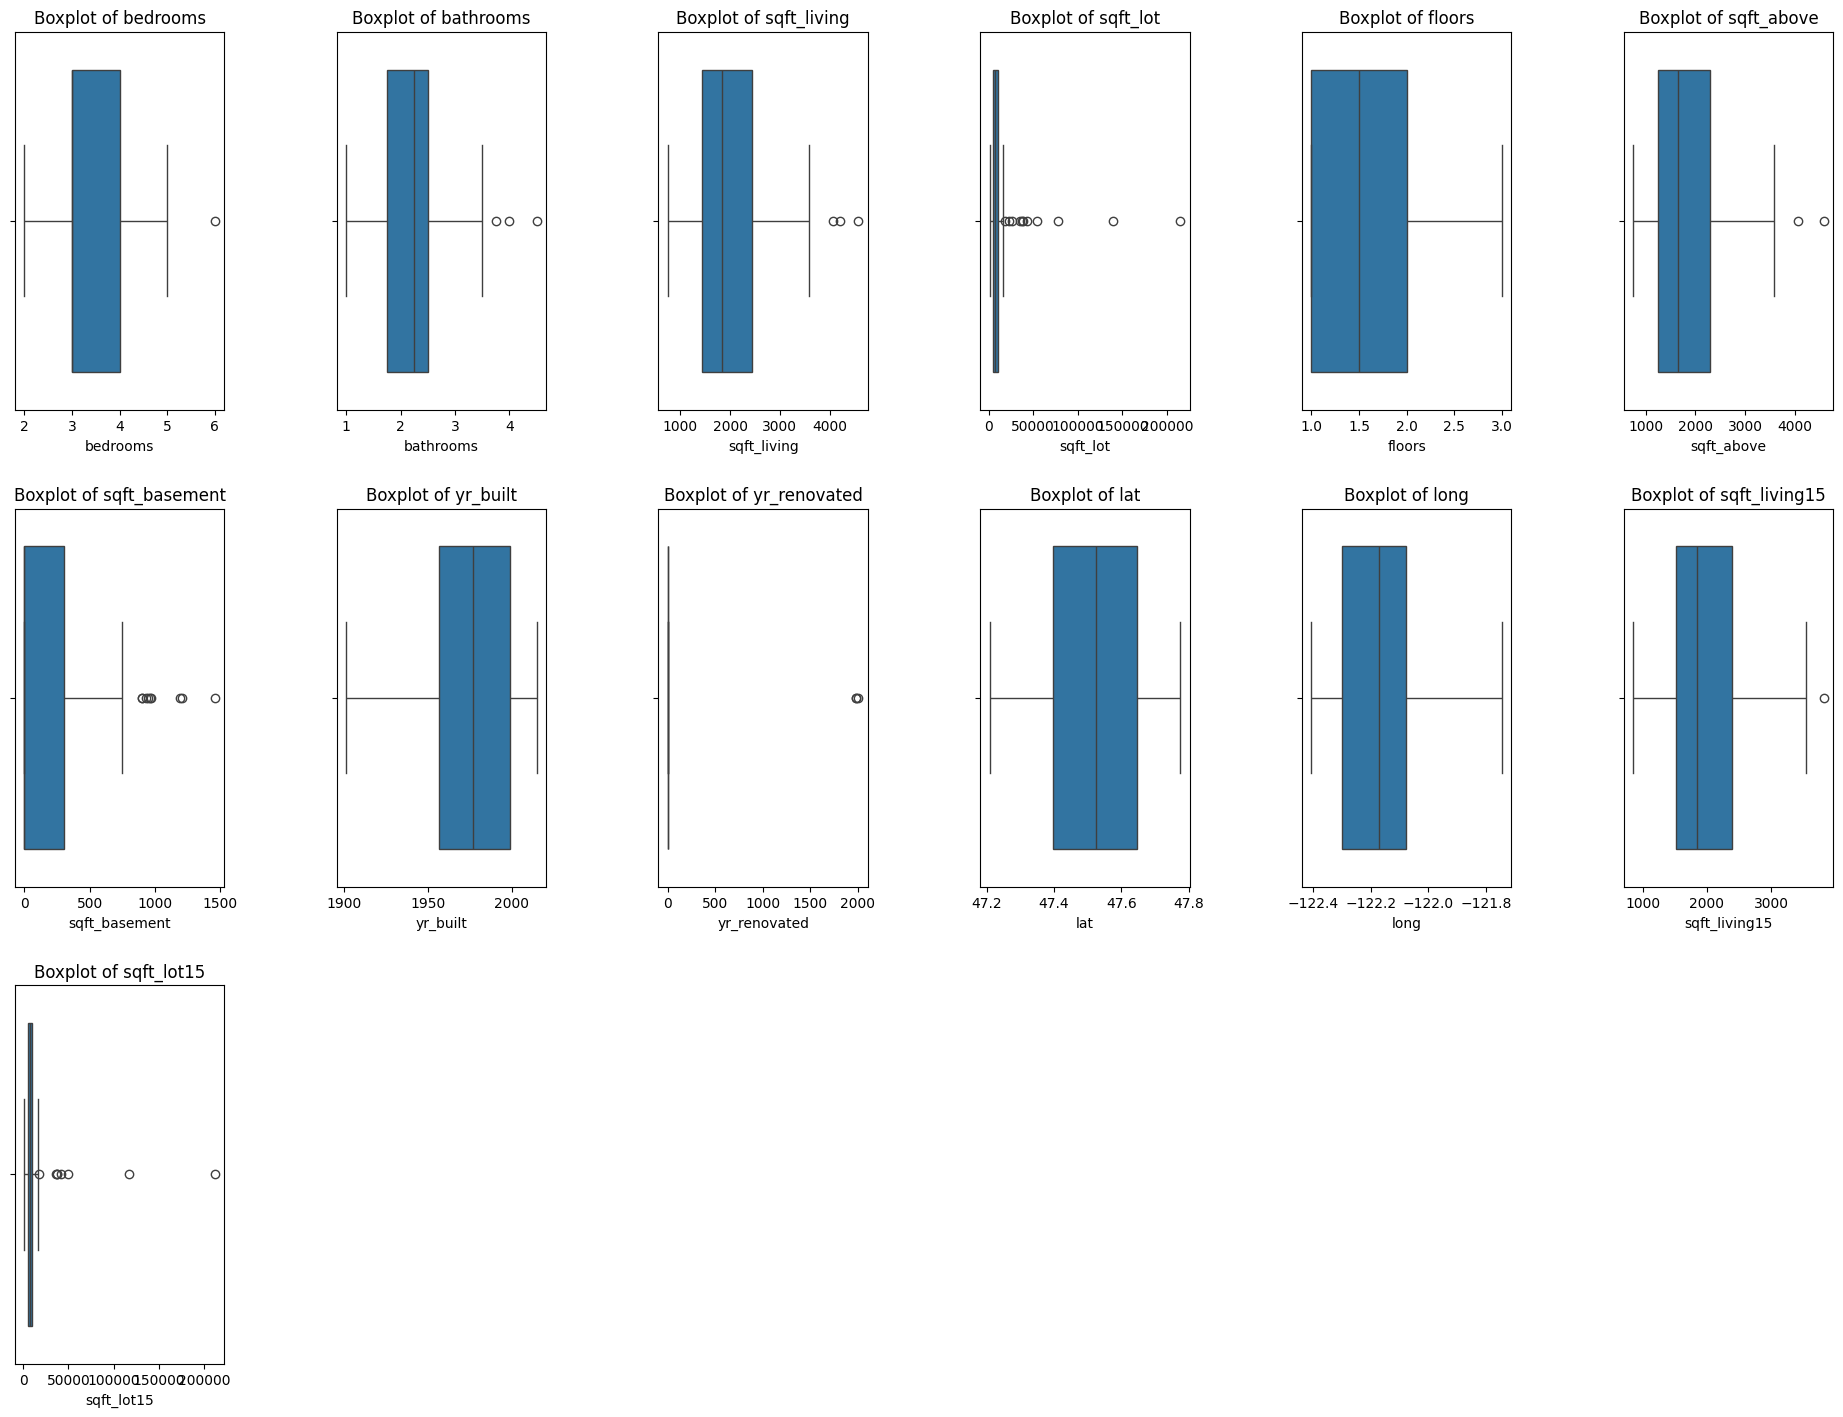

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = df_ftr_unseen

# List of numerical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Define the grid layout
n_rows, n_cols = 3, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {feature}')
    axes_flat[i].set_xlabel(feature)
    axes_flat[i].set_ylabel('')

# Hide any unused subplots
for ax in axes_flat[i+1:]:
    ax.axis('off')

plt.show()


### Correlation Insights

The dataset's correlation analysis reveals key relationships between property features, summarized below:

#### High Positive Correlation
- **sqft_living** with **bathrooms**, **grade**, and **sqft_above**: Larger living spaces tend to have more bathrooms, higher overall quality grades, and more above-ground living area.
- **sqft_lot** with **sqft_lot15**: Indicates a strong relationship between the sizes of property lots and those of the nearest 15 neighbors, suggesting similar lot sizes within neighborhoods.

#### Negative Correlations
- **yr_built** with **condition**: Older homes tend to have a lower condition rating, suggesting that newer homes are often in better condition.
- **zipcode** with **long**: There's a tendency for properties in certain zip codes to be located further west (lower longitude values).


#### Other Notable Correlations
- **bedrooms** with **sqft_living** and **bathrooms**: More bedrooms usually mean larger living spaces and more bathrooms, which aligns with the expectation that larger families need more space.
- **grade** with **sqft_living** and **sqft_above**: Higher-quality (grade) properties often have larger living areas, both in total and above ground, emphasizing the premium on space for higher-graded homes.
- **sqft_living15** (living area of the nearest 15 neighbors) correlates with **sqft_living**, indicating neighborhood consistency in home sizes.

These insights can guide both buyers in understanding the value determinants of properties and sellers in emphasizing key features that correlate with higher value.

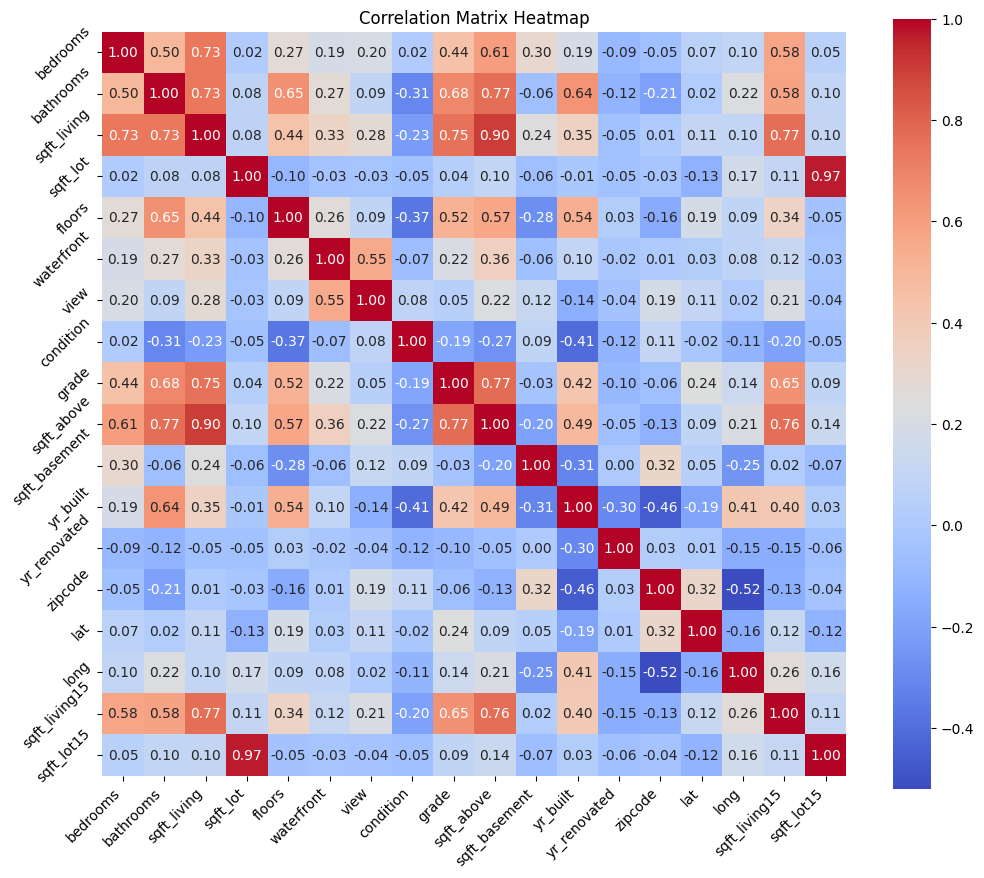

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df_ftr_unseen.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adjust the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

## KC House Data

In [10]:
import pandas as pd
df_kc_house_data = pd.read_csv("../data/kc_house_data.csv")

In [16]:
import json

FEATURES_PATH = '../model/model_features.json'

# Load model feature list
with open(FEATURES_PATH, 'r') as f:
    model_features = json.load(f)

In [17]:
import numpy as np

np.intersect1d(df_kc_house_data.columns.values, np.array(model_features))

array(['bathrooms', 'bedrooms', 'floors', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_lot'], dtype=object)

### Features Description

The dataset contains 21,613 entries and 21 columns, with no missing values reported. Here's a brief overview of the first few rows and the columns:

- **id**: Identifier for the house
- **date**: Date house was sold
- **price**: Price is prediction target
- **bedrooms**: Number of Bedrooms/House
- **bathrooms**: Number of bathrooms/House
- **sqft_living**: Square footage of the home
- **sqft_lot**: Square footage of the lot
- **floors**: Total floors (levels) in house
- **waterfront**: House which has a view to a waterfront
- **view**: Has been viewed
- **condition**: How good the condition is Overall
- **grade**: Overall grade given to the housing unit, based on King County grading system
- **sqft_above**: Square footage of house apart from basement
- **sqft_basement**: Square footage of the basement
- **yr_built**: Built Year
- **yr_renovated**: Year when house was renovated
- **zipcode**: Zip code
- **lat**: Latitude coordinate
- **long**: Longitude coordinate
- **sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15**: LotSize area in 2015(implies-- some renovations)

#### Column intersection between Feature Unseen and KC House Data datasets

The **KC House Data** dataset has all the columns present in the **Feature Unseen** dataset plus the columns **date**, **id** and **price**.

The column **price** is the target.

The columns **date** and **id** are not useful as they don't exist on inference time.

In [19]:
df_kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
import numpy as np

col_intersect = np.intersect1d(df_ftr_unseen.columns.values, df_kc_house_data.columns.values)
print(f"Number of column set insertesctions between Feature Unseen and KC House Data datasets: {col_intersect.size}")
col_intersect

Number of column set insertesctions between Feature Unseen and KC House Data datasets: 18


array(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat',
       'long', 'sqft_above', 'sqft_basement', 'sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
       'yr_built', 'yr_renovated', 'zipcode'], dtype=object)

In [21]:
np.setdiff1d(df_kc_house_data.columns.values, col_intersect)

array(['date', 'id', 'price'], dtype=object)

### Summary Statistics

#### Key Points
- **Price**: Shows a wide range in property values, indicating a diverse market. The distribution is right-skewed, suggesting that most properties are in the lower price range, with a few high-value outliers.

- **Bedrooms**: The number of bedrooms ranges from unusual values (like 0 and 33) to more common configurations. The distribution centers around 3-bedroom houses, which are the most common.

- **Bathrooms**: Similar to bedrooms, the bathroom counts show a variety with a distribution that suggests 2 bathrooms is a common configuration.

- **Square Footage (Living Space and Lot)**: Both living space and lot size exhibit a wide range of values, indicating a diversity in property sizes. The distributions are right-skewed, pointing to the prevalence of smaller properties with fewer larger properties.

- **Floors**: Single-story homes are the most common, but there is a notable presence of homes with multiple floors.

- **Year Built**: The dataset includes homes built over a century, from 1900 to 2015, suggesting a mix of historic and modern properties.

This summary provides an overview of the dataset's key numerical features, highlighting the diversity and range of properties it encompasses.


In [22]:
df_kc_house_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [23]:
df_kc_house_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### Histograms

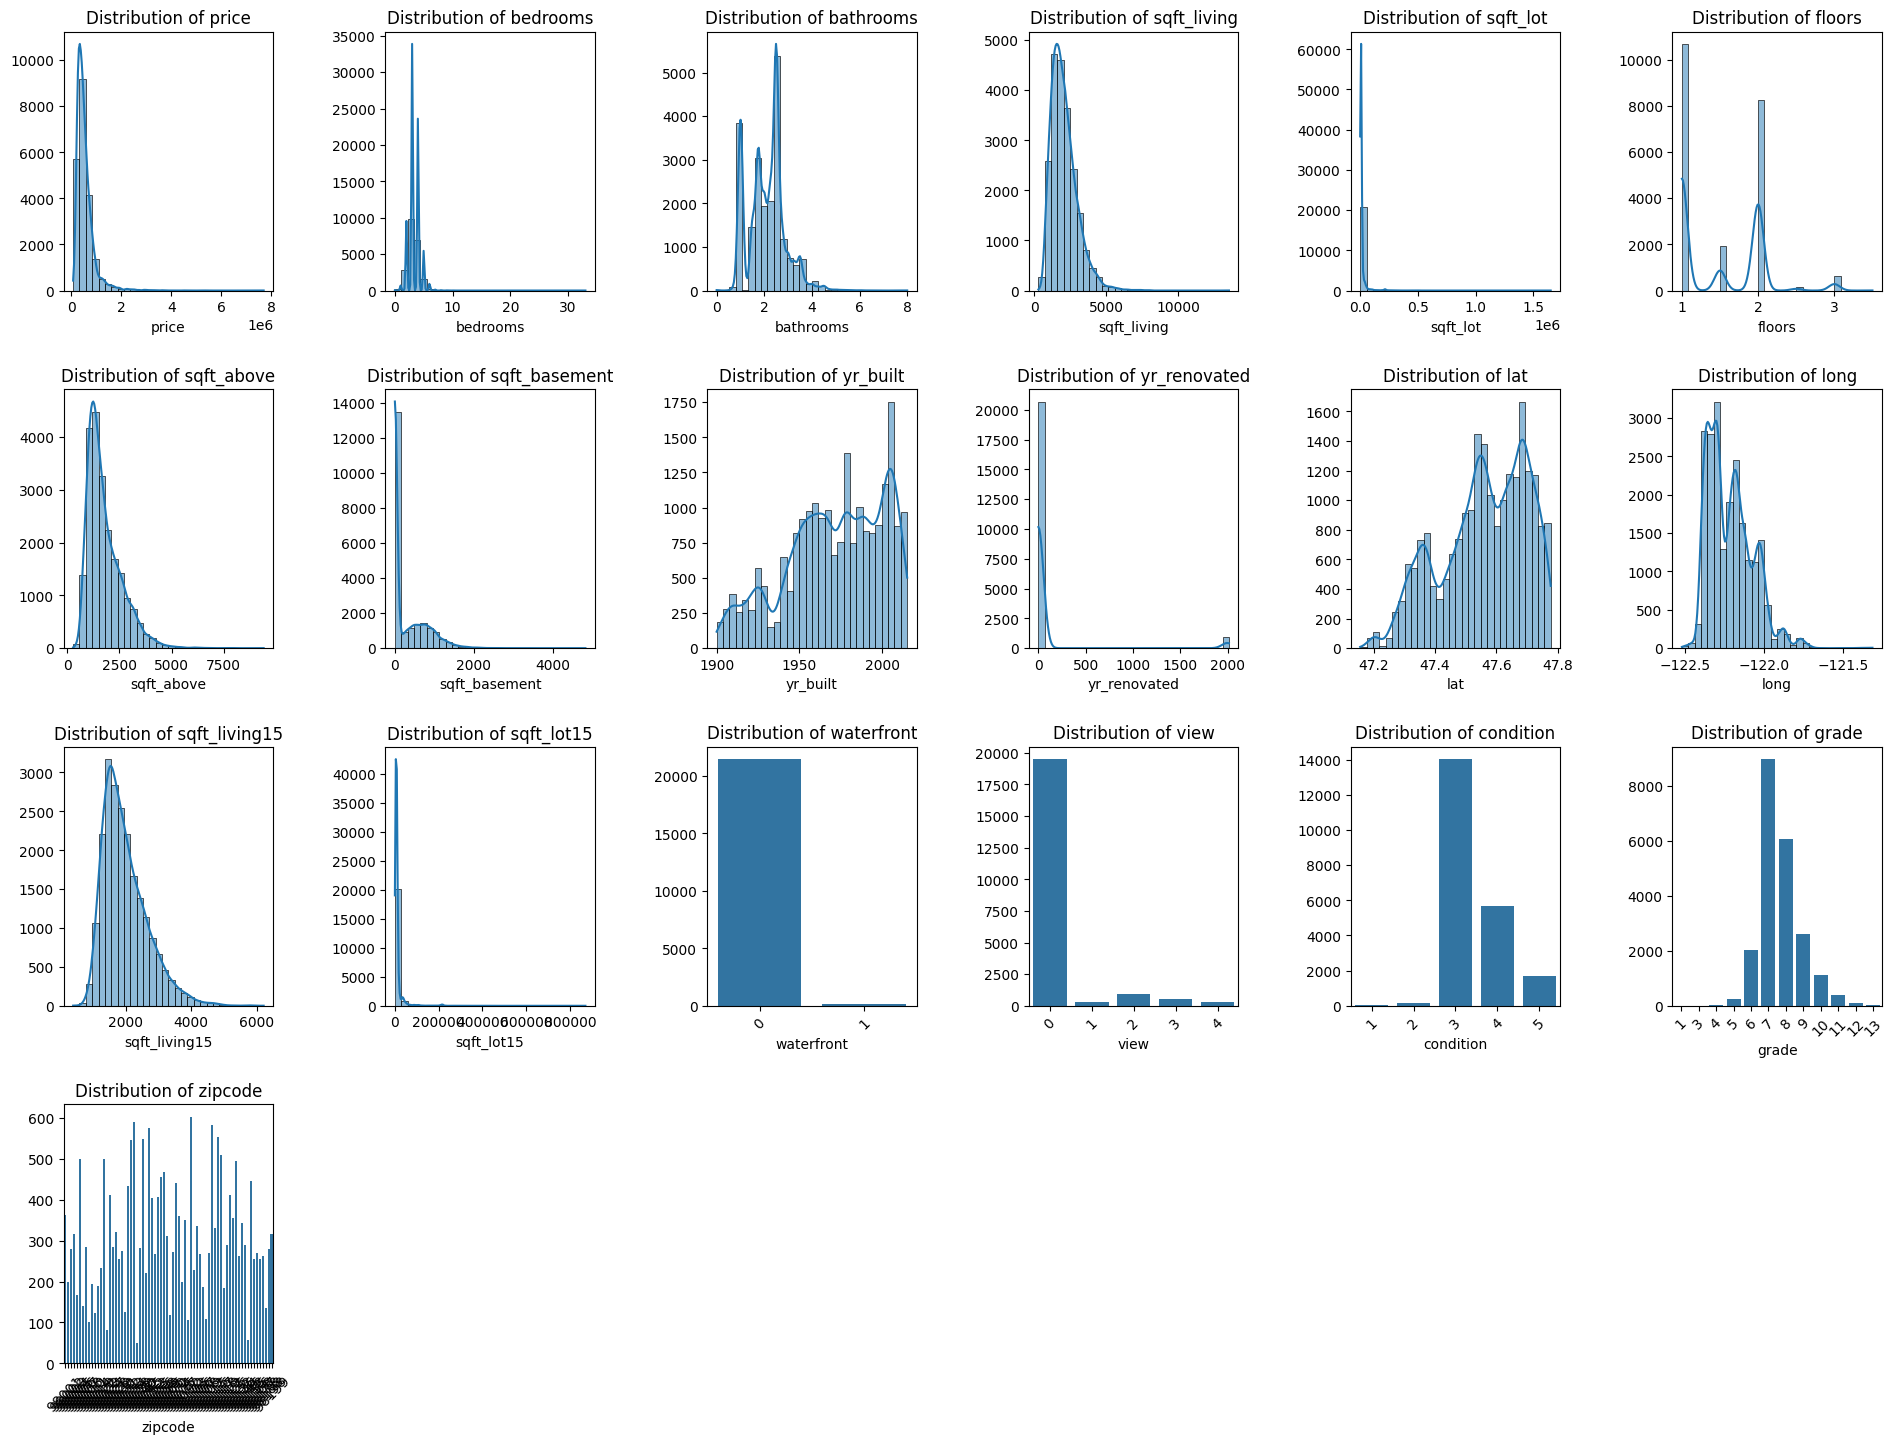

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = df_kc_house_data

# List of numerical and categorical features
numerical_features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
all_features = numerical_features + categorical_features

# Define the grid layout
n_rows, n_cols = 4, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Plot distribution for each feature
for i, feature in enumerate(all_features):
    if feature in numerical_features:
        sns.histplot(data[feature], kde=True, bins=30, ax=axes_flat[i])
    else:
        sns.countplot(x=data[feature], ax=axes_flat[i])
        for label in axes_flat[i].get_xticklabels():
            label.set_rotation(45)
    
    axes_flat[i].set_title(f'Distribution of {feature}')
    axes_flat[i].set_xlabel(feature)
    axes_flat[i].set_ylabel('')

# Hide any unused subplots
for ax in axes_flat[i+1:]:
    ax.axis('off')

plt.show()

#### Boxplots

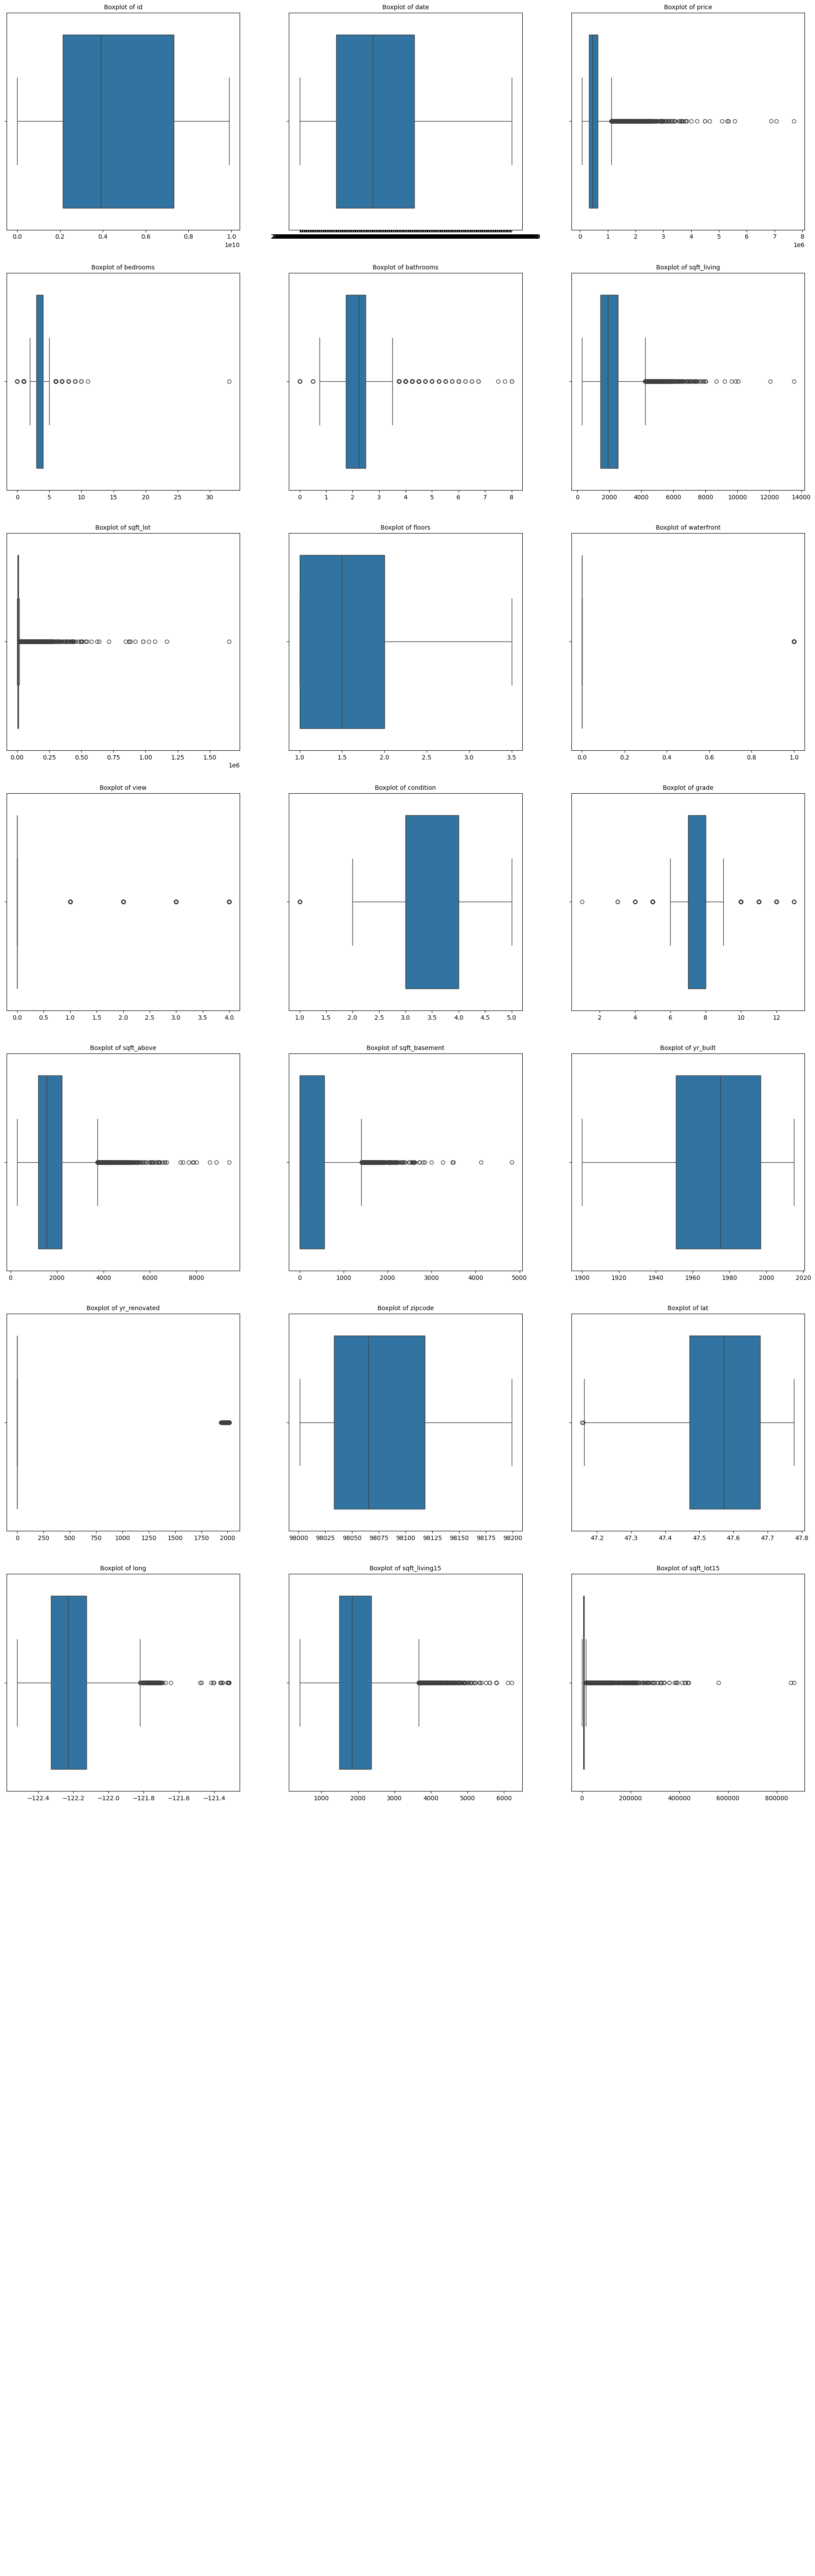

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is already loaded with the Zipcode dataset
# data = pd.read_csv('your_zipcode_dataset.csv') # This line is commented because data is already loaded

# List of all features in the Zipcode dataset
features = data.columns.tolist()

# Define the grid layout
n_rows, n_cols = 10, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 60))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=data[feature], ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {feature}', fontsize=10)
    axes_flat[i].set_xlabel('')
    axes_flat[i].set_ylabel('')

# Hide any unused subplots
for ax in axes_flat[i+1:]:
    ax.axis('off')

plt.show()

#### Geographic Distribution of Price

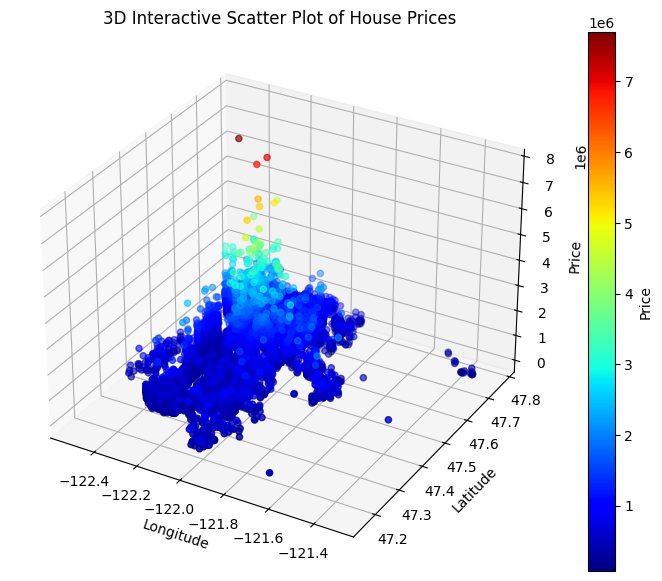

In [26]:
# Enabling the notebook backend for interactive plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = df_kc_house_data

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting data
x = data['long']
y = data['lat']
z = data['price']

# Using the price as color reference, applying a colormap
sc = ax.scatter(x, y, z, c=z, cmap='jet', marker='o')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

# Adding a color bar to provide a reference to the price values
plt.colorbar(sc, label='Price')

plt.title('3D Interactive Scatter Plot of House Prices')
plt.show()

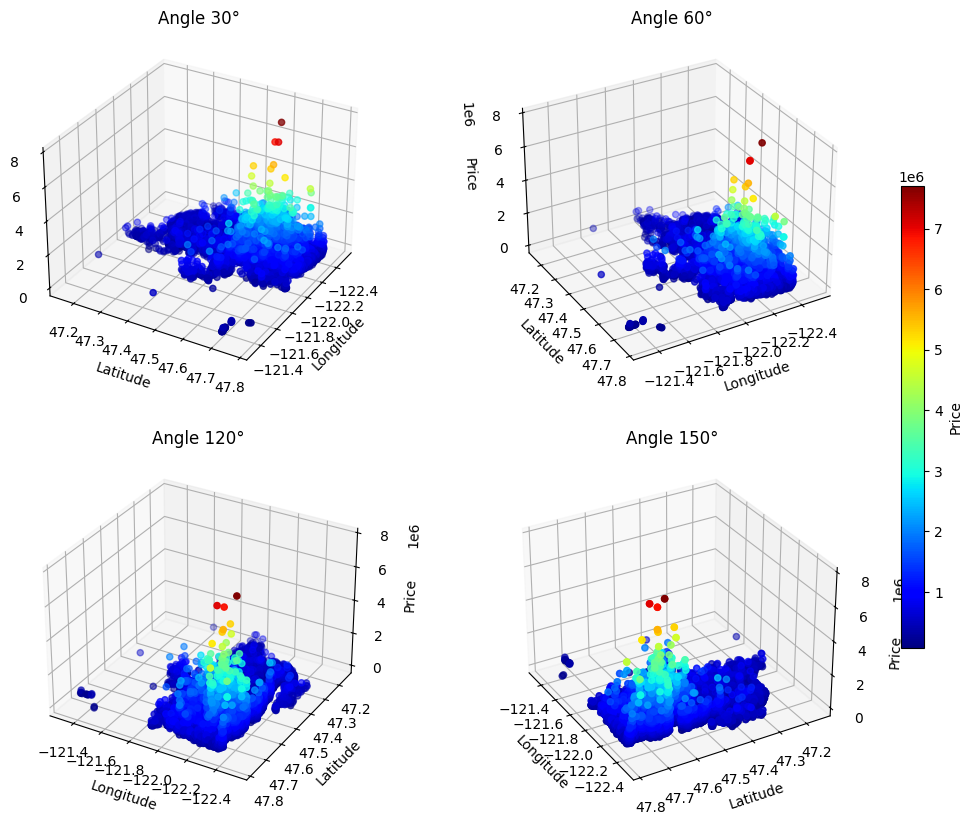

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your DataFrame and it has been loaded previously.
data = df_kc_house_data  # Example DataFrame loading step, uncomment and replace with actual data loading if needed.

# Creating 4 subplots from different angles in a 2x2 grid
fig = plt.figure(figsize=(14, 10))

angles = [30, 60, 120, 150]
titles = ['Angle 30°', 'Angle 60°', 'Angle 120°', 'Angle 150°']

for i, angle in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(data['long'], data['lat'], data['price'], c=data['price'], cmap='jet', marker='o')
    ax.view_init(30, angle)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Price')
    ax.set_title(titles[i-1])

plt.colorbar(ax.scatter(data['long'], data['lat'], data['price'], c=data['price'], cmap='jet', marker='o'), ax=fig.axes, shrink=0.6, label='Price')
plt.show()

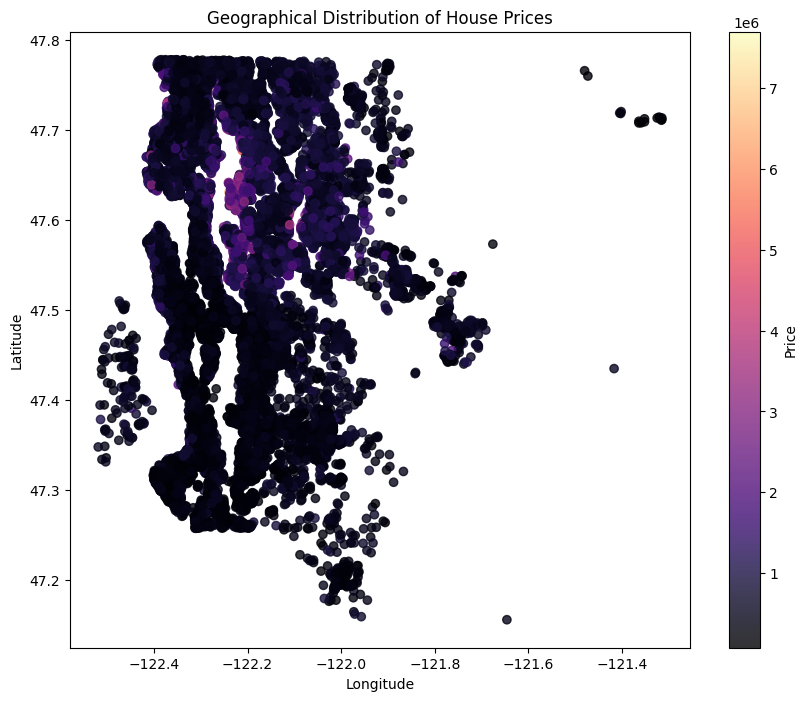

In [28]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'long', 'lat', and 'price'
plt.figure(figsize=(10, 8))

# Adding the alpha parameter to adjust transparency
sc = plt.scatter(data['long'], data['lat'], c=data['price'], cmap='magma', alpha=0.8)

plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to represent prices
plt.colorbar(sc, label='Price')

plt.show()

### Correlation Insights

The correlation analysis with a focus on `price` reveals how property values interact with various features, offering insights into the housing market dynamics:

#### Strong Positive Correlations with Price
- **sqft_living**: Demonstrates the strongest positive correlation with price, indicating that larger living areas significantly contribute to higher property values.
- **grade**: High correlation with price suggests that properties with higher quality and construction standards are valued more in the market.
- **sqft_above**: The above-ground living area also shows a strong positive correlation with price, underscoring the premium on usable living space.

#### Moderate Positive Correlations
- **bathrooms** and **bedrooms**: While these features show positive correlations with price, they are not as strong as sqft_living or grade. This suggests that while the number of bedrooms and bathrooms contributes to property value, they do so to a lesser extent compared to the overall size and quality of the home.
- **view** and **waterfront**: Properties with better views or waterfront locations tend to have higher prices, reflecting the premium on aesthetic and locational attributes.

#### Minimal or Negative Correlations
- **condition** and **yr_built**: These features have minimal to slightly negative correlations with price. While one might expect newer or better-maintained homes to command higher prices, this correlation suggests other factors (like location, size, and quality) play more significant roles in determining value.
- **zipcode**: The correlation between zipcode and price is not straightforward, indicating that property values can vary widely within the same postal area, likely influenced by other factors such as lot size, living area, and home quality.

#### Insights
- The data underscores the complexity of real estate valuation, where multiple factors interplay to determine a property's market value.
- Size (sqft_living, sqft_above) and quality (grade) emerge as primary drivers of value, while locational advantages (view, waterfront) also add significant premiums.
- Features traditionally considered desirable (newer homes, condition) have less impact on price than might be expected, suggesting that buyers prioritize size, quality, and location over age or condition.

Understanding these correlations helps buyers, sellers, and real estate professionals make informed decisions by highlighting the features that contribute most to property value in this market.


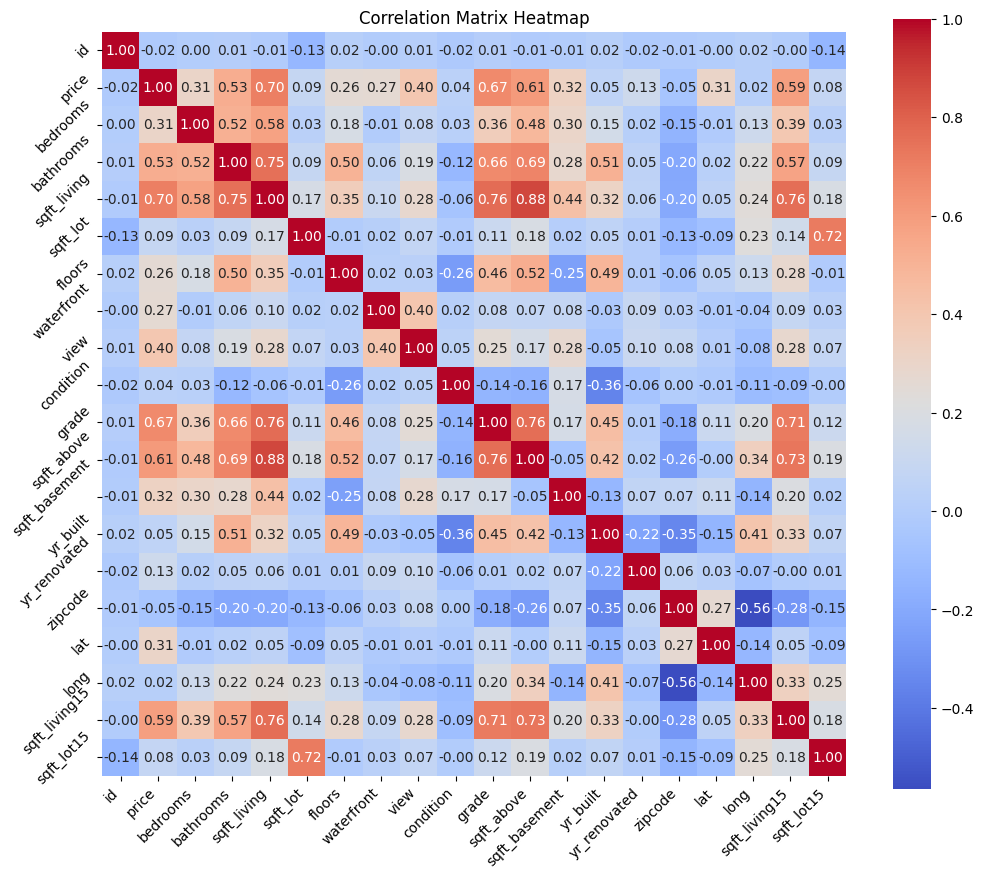

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df_kc_house_data.drop(['date'], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adjust the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Correlation Matrix after some feature engineering

In [30]:
# A new feature from yr_built
df_kc_house_data['property_age'] = max(df_kc_house_data['yr_built']) - df_kc_house_data['yr_built']

# A new feature from yr_renovated
# Rationale: yrs_since_last_improvement = max(yr_built) - (yr_renovated OR yr_built if yr_renovated == 0)
df_kc_house_data['yrs_since_last_improvement'] = max(df_kc_house_data['yr_built']) - df_kc_house_data[['yr_built', 'yr_renovated']].max(axis=1)

In [31]:
import pandas as pd

# Calculate the correlation matrix
corr = df_kc_house_data.drop(['date'], axis=1).corr()

# Isolate the correlations with 'price'
price_correlations = corr['price']

# Filter columns where correlation with 'price' is greater than K
K = 0.2  # Set the threshold for correlation
high_corr_columns = price_correlations[abs(price_correlations) > K].index.tolist()

# Removing 'price' from the list to focus on other features
high_corr_columns.remove('price')

print("Columns with correlation to 'price' greater than", K, ":", high_corr_columns)


Columns with correlation to 'price' greater than 0.2 : ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


In [32]:
import numpy as np
np.intersect1d(df_kc_house_data.columns.values, np.array(model_features))

array(['bathrooms', 'bedrooms', 'floors', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_lot'], dtype=object)

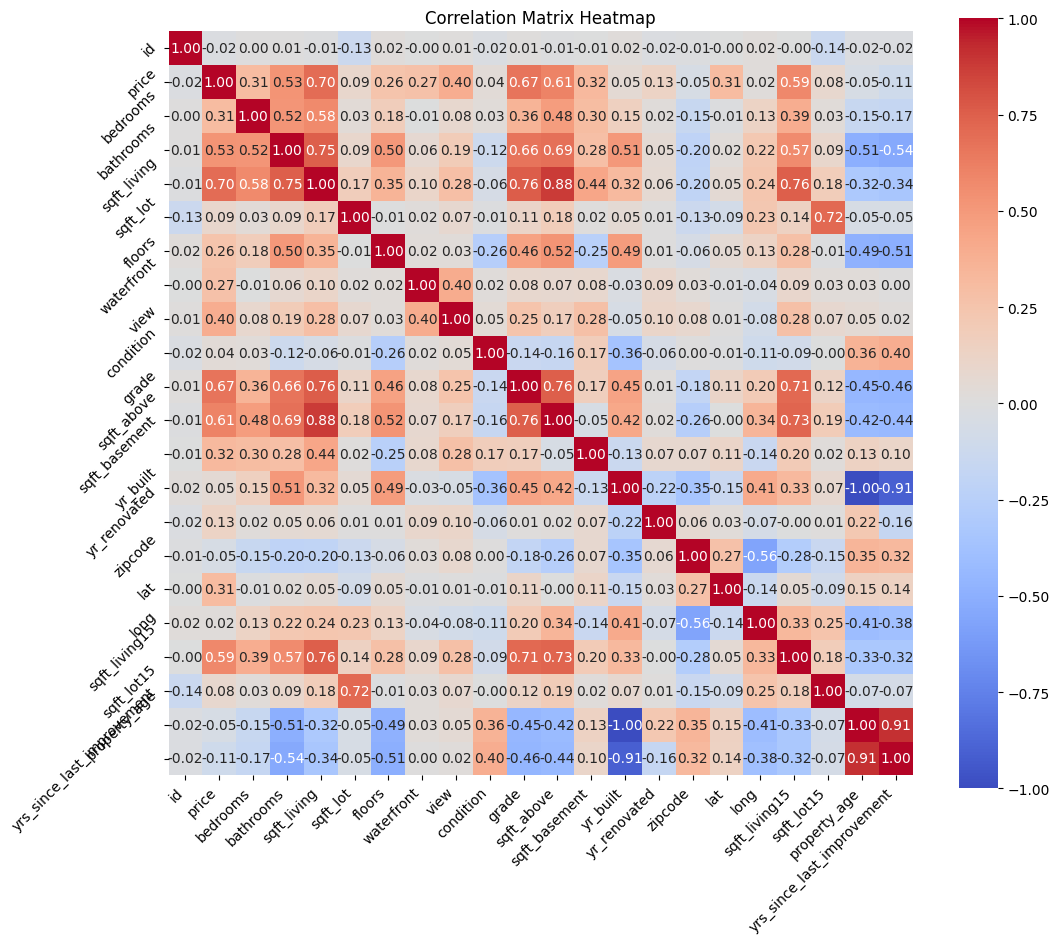

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adjust the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Zipcode Data

In [5]:
import pandas as pd

In [6]:
df_zipcode = pd.read_csv("../data/zipcode_demographics.csv") 

In [7]:
df_zipcode.sort_values('zipcode', ascending=True)

ppltn_qty  urbn_ppltn_qty  sbrbn_ppltn_qty  farm_ppltn_qty  non_farm_qty  \
8     25495.0         25245.0              0.0             0.0         250.0   
39    30905.0         30894.0              0.0             0.0          11.0   
52    42614.0         42614.0              0.0             0.0           0.0   
14    22903.0         22903.0              0.0             0.0           0.0   
43    17150.0         17150.0              0.0             0.0           0.0   
..        ...             ...              ...             ...           ...   
35    18829.0         18829.0              0.0             0.0           0.0   
3     21956.0         21956.0              0.0             0.0           0.0   
40    22269.0         22219.0              0.0             0.0          50.0   
46    33807.0         33697.0              0.0             0.0         110.0   
55    19287.0         19287.0              0.0             0.0           0.0   

    medn_hshld_incm_amt  medn_incm_per_prsn_amt  hous_val_amt  \
8               60534.0                 24011.0      168400.0   
39              36991.0                 18741.0      141500.0   
52              43027.0                 21092.0      166800.0   
14              63358.0                 49107.0      432300.0   
43              60173.0                 36019.0      343500.0   
..                  ...                     ...           ...   
35              65514.0                 35408.0      299400.0   
3               47461.0                 22158.0      175400.0   
40              40618.0                 22672.0      162500.0   
46              46628.0                 22518.0      171300.0   
55              59542.0                 37754.0      363400.0   

    edctn_less_than_9_qty  edctn_9_12_qty  ...  per_farm  per_non_farm  \
8                   475.0          1828.0  ...       0.0           0.0   
39                 1114.0          3502.0  ...       0.0           0.0   
52                  921.0          3690.0  ...       0.0           0.0   
14                  287.0           678.0  ...       0.0           0.0   
43                  352.0           614.0  ...       0.0           0.0   
..                    ...             ...  ...       ...           ...   
35                  166.0           871.0  ...       0.0           0.0   
3                   925.0          1773.0  ...       0.0           0.0   
40                  963.0          2026.0  ...       0.0           0.0   
46                 1119.0          3169.0  ...       0.0           0.0   
55                  171.0           479.0  ...       0.0           0.0   

    per_less_than_9  per_9_to_12  per_hsd  per_some_clg  per_assoc  per_bchlr  \
8               1.0          7.0     20.0          20.0        6.0       10.0   
39              3.0         11.0     25.0          19.0        5.0        6.0   
52              2.0          8.0     20.0          20.0        6.0       10.0   
14              1.0          2.0      9.0          17.0        6.0       28.0   
43              2.0          3.0     10.0          17.0        4.0       26.0   
..              ...          ...      ...           ...        ...        ...   
35              0.0          4.0     12.0          17.0        4.0       25.0   
3               4.0          8.0     20.0          21.0        5.0       12.0   
40              4.0          9.0     24.0          20.0        6.0       10.0   
46              3.0          9.0     20.0          22.0        6.0       10.0   
55              0.0          2.0     10.0          20.0        4.0       29.0   

    per_prfsnl  zipcode  
8          3.0    98001  
39         2.0    98002  
52         4.0    98003  
14        15.0    98004  
43        16.0    98005  
..         ...      ...  
35        12.0    98177  
3          4.0    98178  
40         2.0    98188  
46         4.0    98198  
55        14.0    98199  

[70 rows x 27 columns]

In [10]:
df_zipcode.set_index("zipcode").iloc[8]

ppltn_qty                  25495.0
urbn_ppltn_qty             25245.0
sbrbn_ppltn_qty                0.0
farm_ppltn_qty                 0.0
non_farm_qty                 250.0
medn_hshld_incm_amt        60534.0
medn_incm_per_prsn_amt     24011.0
hous_val_amt              168400.0
edctn_less_than_9_qty        475.0
edctn_9_12_qty              1828.0
edctn_high_schl_qty         5293.0
edctn_some_clg_qty          5336.0
edctn_assoc_dgre_qty        1687.0
edctn_bchlr_dgre_qty        2725.0
edctn_prfsnl_qty             856.0
per_urbn                      99.0
per_sbrbn                      0.0
per_farm                       0.0
per_non_farm                   0.0
per_less_than_9                1.0
per_9_to_12                    7.0
per_hsd                       20.0
per_some_clg                  20.0
per_assoc                      6.0
per_bchlr                     10.0
per_prfsnl                     3.0
Name: 98001, dtype: float64

In [36]:
demographic_features = dict(df_zipcode.set_index('zipcode').loc[98001])

### Features Description

- `ppltn_qty`: Total population quantity in the zip code area.
- `urbn_ppltn_qty`: Quantity of the population living in urban areas within the zip code.
- `sbrbn_ppltn_qty`: Quantity of the population living in suburban areas within the zip code.
- `farm_ppltn_qty`: Quantity of the population living in farm areas within the zip code.
- `non_farm_qty`: Quantity of the population living in non-farm areas within the zip code.
- `medn_hshld_incm_amt`: Median household income amount in the zip code area.
- `medn_incm_per_prsn_amt`: Median income amount per person in the zip code area.
- `hous_val_amt`: Housing value amount in the zip code area.
- `edctn_less_than_9_qty`: Quantity of people with less than 9 years of education in the zip code.
- `edctn_9_12_qty`: Quantity of people with 9 to 12 years of education (no diploma) in the zip code.
- `edctn_high_schl_qty`: Quantity of people with a high school level of education in the zip code.
- `edctn_some_clg_qty`: Quantity of people with some college level of education in the zip code.
- `edctn_assoc_dgre_qty`: Quantity of people with an associate degree in the zip code.
- `edctn_bchlr_dgre_qty`: Quantity of people with a bachelor's degree in the zip code.
- `edctn_prfsnl_qty`: Quantity of people with a professional degree in the zip code.
- `per_urbn`: Percentage of the population living in urban areas within the zip code.
- `per_sbrbn`: Percentage of the population living in suburban areas within the zip code.
- `per_farm`: Percentage of the population living in farm areas within the zip code.
- `per_non_farm`: Percentage of the population living in non-farm areas within the zip code.
- `per_less_than_9`: Percentage of people with less than 9 years of education in the zip code.
- `per_9_to_12`: Percentage of people with 9 to 12 years of education (no diploma) in the zip code.
- `per_hsd`: Percentage of people with a high school level of education in the zip code.
- `per_some_clg`: Percentage of people with some college level of education in the zip code.
- `per_assoc`: Percentage of people with an associate degree in the zip code.
- `per_bchlr`: Percentage of people with a bachelor's degree in the zip code.
- `per_prfsnl`: Percentage of people with a professional degree in the zip code.
- `zipcode`: Zip code area identifier.


The dataset contains 70 rows and 27 columns, focusing on demographic and socioeconomic indicators for different zip codes. Here are the types of information it includes:

- Population counts (total, urban, suburban, farm, non-farm)
- Median household income and median income per person
- Housing value
- Education levels (quantities and percentages for various education levels)
- Zip codes

The dataset has no missing values across all its columns, which is great for our analysis. Here’s a brief summary of the dataset's numerical features:

- The population counts (`ppltn_qty`, `urbn_ppltn_qty`, etc.) vary widely, with mean values indicating a bias towards urban populations.
- Median household income (`medn_hshld_incm_amt`) and median income per person (`medn_incm_per_prsn_amt`) also show a broad range, with means of approximately USD 57,531 and USD 30,623, respectively.
- Housing values (`hous_val_amt`) have a mean of around $263,954, but they also exhibit a wide spread, indicating diverse living conditions across the zip codes.
- Education levels (`edctn_*`) and their percentages show varied levels of educational attainment.


In [37]:
df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ppltn_qty               70 non-null     float64
 1   urbn_ppltn_qty          70 non-null     float64
 2   sbrbn_ppltn_qty         70 non-null     float64
 3   farm_ppltn_qty          70 non-null     float64
 4   non_farm_qty            70 non-null     float64
 5   medn_hshld_incm_amt     70 non-null     float64
 6   medn_incm_per_prsn_amt  70 non-null     float64
 7   hous_val_amt            70 non-null     float64
 8   edctn_less_than_9_qty   70 non-null     float64
 9   edctn_9_12_qty          70 non-null     float64
 10  edctn_high_schl_qty     70 non-null     float64
 11  edctn_some_clg_qty      70 non-null     float64
 12  edctn_assoc_dgre_qty    70 non-null     float64
 13  edctn_bchlr_dgre_qty    70 non-null     float64
 14  edctn_prfsnl_qty        70 non-null     floa

### Summary Statistics

#### Keypoints

- **Population Counts**: 
  - Mean population (`ppltn_qty`) across zip codes is approximately 25,655, indicating a moderate population density.
  - Urban areas (`urbn_ppltn_qty`) dominate in these zip codes, with suburban, farm, and non-farm populations much smaller in comparison.

- **Median Household Income**:
  - The average median household income (`medn_hshld_incm_amt`) across zip codes is about $57,531, showing considerable economic variability.

- **Housing Value**:
  - Mean housing value (`hous_val_amt`) stands at approximately $263,954, with a wide range indicating diverse living standards.

- **Education Levels**:
  - Education distribution shows a significant spread across different levels, from less than 9 years to professional degrees. The data indicates varied educational attainment across zip codes.

- **Educational Attainment Percentages**:
  - Percentages of educational attainment (`per_less_than_9` to `per_prfsnl`) reflect the diversity in education levels within these communities, with a notable percentage holding bachelor's degrees or higher.

These statistics provide a broad overview of the socioeconomic and demographic characteristics of the zip code areas included in the dataset.


In [38]:
df_zipcode.head()

ppltn_qty  urbn_ppltn_qty  sbrbn_ppltn_qty  farm_ppltn_qty  non_farm_qty  \
0    38249.0         37394.0              0.0             0.0         855.0   
1    22036.0         22036.0              0.0             0.0           0.0   
2    18194.0         18194.0              0.0             0.0           0.0   
3    21956.0         21956.0              0.0             0.0           0.0   
4    22814.0         22814.0              0.0             0.0           0.0   

   medn_hshld_incm_amt  medn_incm_per_prsn_amt  hous_val_amt  \
0              66051.0                 25219.0      192000.0   
1              91904.0                 53799.0      573900.0   
2              61813.0                 31765.0      246600.0   
3              47461.0                 22158.0      175400.0   
4              48606.0                 28398.0      252600.0   

   edctn_less_than_9_qty  edctn_9_12_qty  ...  per_farm  per_non_farm  \
0                  437.0          2301.0  ...       0.0           2.0   
1                  149.0           404.0  ...       0.0           0.0   
2                  269.0           905.0  ...       0.0           0.0   
3                  925.0          1773.0  ...       0.0           0.0   
4                  599.0          1148.0  ...       0.0           0.0   

   per_less_than_9  per_9_to_12  per_hsd  per_some_clg  per_assoc  per_bchlr  \
0              1.0          6.0     18.0          20.0        5.0       12.0   
1              0.0          1.0      6.0          12.0        3.0       27.0   
2              1.0          4.0     13.0          20.0        6.0       19.0   
3              4.0          8.0     20.0          21.0        5.0       12.0   
4              2.0          5.0     13.0          17.0        5.0       23.0   

   per_prfsnl  zipcode  
0         4.0    98042  
1        22.0    98040  
2         9.0    98028  
3         4.0    98178  
4        12.0    98007  

[5 rows x 27 columns]

In [39]:
df_zipcode.describe()

ppltn_qty  urbn_ppltn_qty  sbrbn_ppltn_qty  farm_ppltn_qty  \
count     70.000000       70.000000        70.000000       70.000000   
mean   25655.242857    24543.814286       192.457143       16.442857   
std    11550.597239    12613.622494      1359.783707       59.566948   
min     3037.000000        0.000000         0.000000        0.000000   
25%    19449.500000    18943.500000         0.000000        0.000000   
50%    23926.500000    23298.000000         0.000000        0.000000   
75%    31013.750000    30773.500000         0.000000        0.000000   
max    64181.000000    64181.000000     11176.000000      439.000000   

       non_farm_qty  medn_hshld_incm_amt  medn_incm_per_prsn_amt  \
count     70.000000            70.000000               70.000000   
mean     866.614286         57530.785714            30623.342857   
std     2007.028175         16166.136140            10256.973419   
min        0.000000         32085.000000            17087.000000   
25%        0.000000         46397.750000            24422.000000   
50%        0.000000         56933.000000            27639.500000   
75%      313.000000         63599.500000            35207.250000   
max     9973.000000        132665.000000            81926.000000   

        hous_val_amt  edctn_less_than_9_qty  edctn_9_12_qty  ...   per_farm  \
count      70.000000              70.000000       70.000000  ...  70.000000   
mean   263954.285714             633.614286     1472.514286  ...   0.100000   
std    107660.168762             653.259925      989.467354  ...   0.386362   
min    141500.000000               4.000000       51.000000  ...   0.000000   
25%    193225.000000             200.000000      707.750000  ...   0.000000   
50%    239850.000000             406.000000     1213.000000  ...   0.000000   
75%    288925.000000             899.750000     1933.750000  ...   0.000000   
max    790300.000000            3671.000000     4483.000000  ...   2.000000   

       per_non_farm  per_less_than_9  per_9_to_12    per_hsd  per_some_clg  \
count     70.000000        70.000000    70.000000  70.000000     70.000000   
mean       7.014286         1.885714     5.228571  14.642857     18.814286   
std       19.557787         2.183886     2.687445   4.839558      3.084758   
min        0.000000         0.000000     1.000000   5.000000     11.000000   
25%        0.000000         1.000000     3.000000  11.000000     17.250000   
50%        0.000000         1.000000     5.000000  15.000000     19.000000   
75%        0.750000         2.000000     7.000000  18.000000     20.000000   
max       98.000000        11.000000    11.000000  25.000000     34.000000   

       per_assoc  per_bchlr  per_prfsnl       zipcode  
count  70.000000  70.000000   70.000000     70.000000  
mean    5.085714  19.142857    8.771429  98077.300000  
std     0.880429   7.589630    5.420496     56.622408  
min     2.000000   6.000000    2.000000  98001.000000  
25%     5.000000  12.250000    4.000000  98029.250000  
50%     5.000000  19.000000    7.500000  98067.500000  
75%     6.000000  25.000000   12.000000  98117.750000  
max     7.000000  39.000000   24.000000  98199.000000  

[8 rows x 27 columns]

#### Histograms

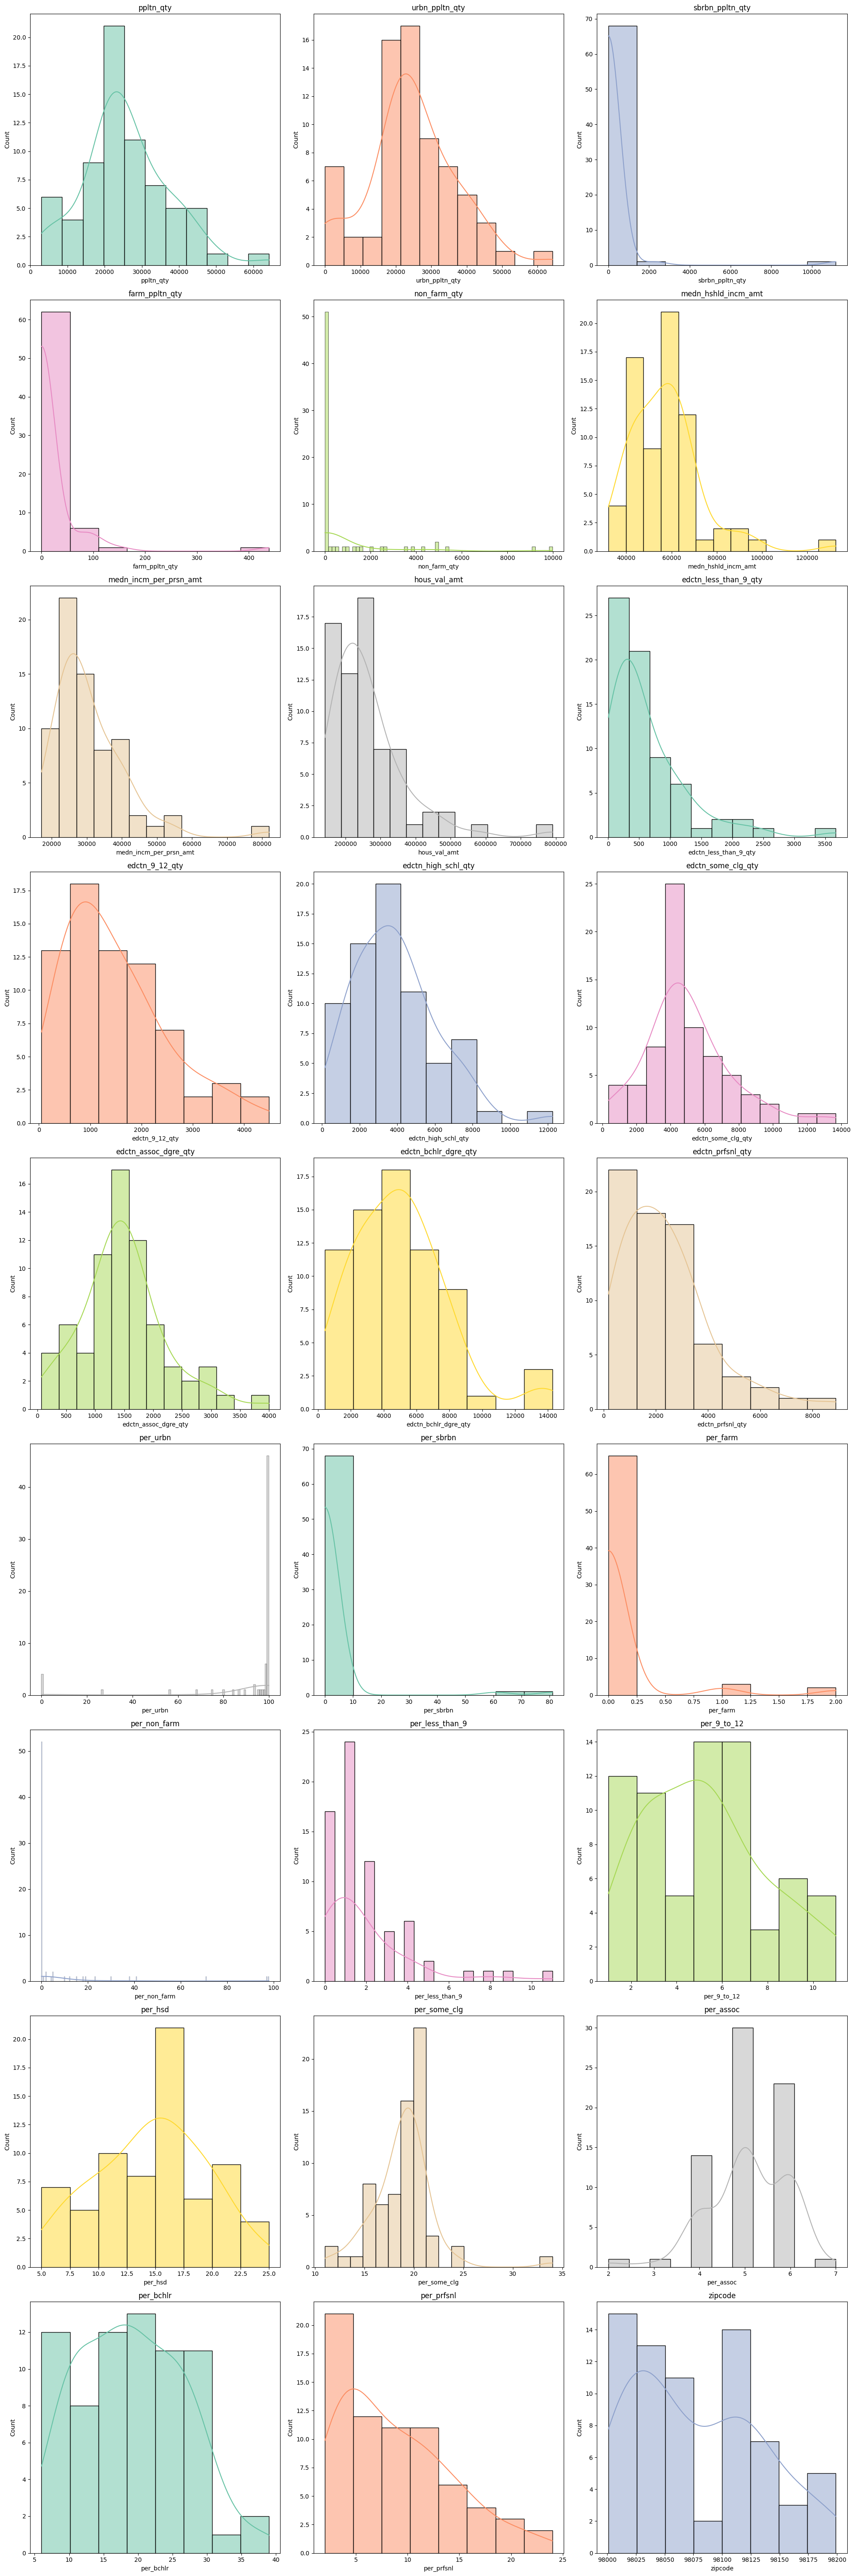

In [40]:
data = df_zipcode

# Define the figure size and grid layout for plotting histograms of all features
plt.figure(figsize=(20, 60))

# Number of columns for the grid
n_cols = 3

# Calculate the total number of rows needed
n_rows = (len(data.columns) + n_cols - 1) // n_cols

# Loop through all the columns and create a subplot for each feature
for i, column in enumerate(data.columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data[column], kde=True, color=sns.color_palette("Set2")[i % 8])
    plt.title(column)

plt.tight_layout()
plt.show()

#### Boxplots

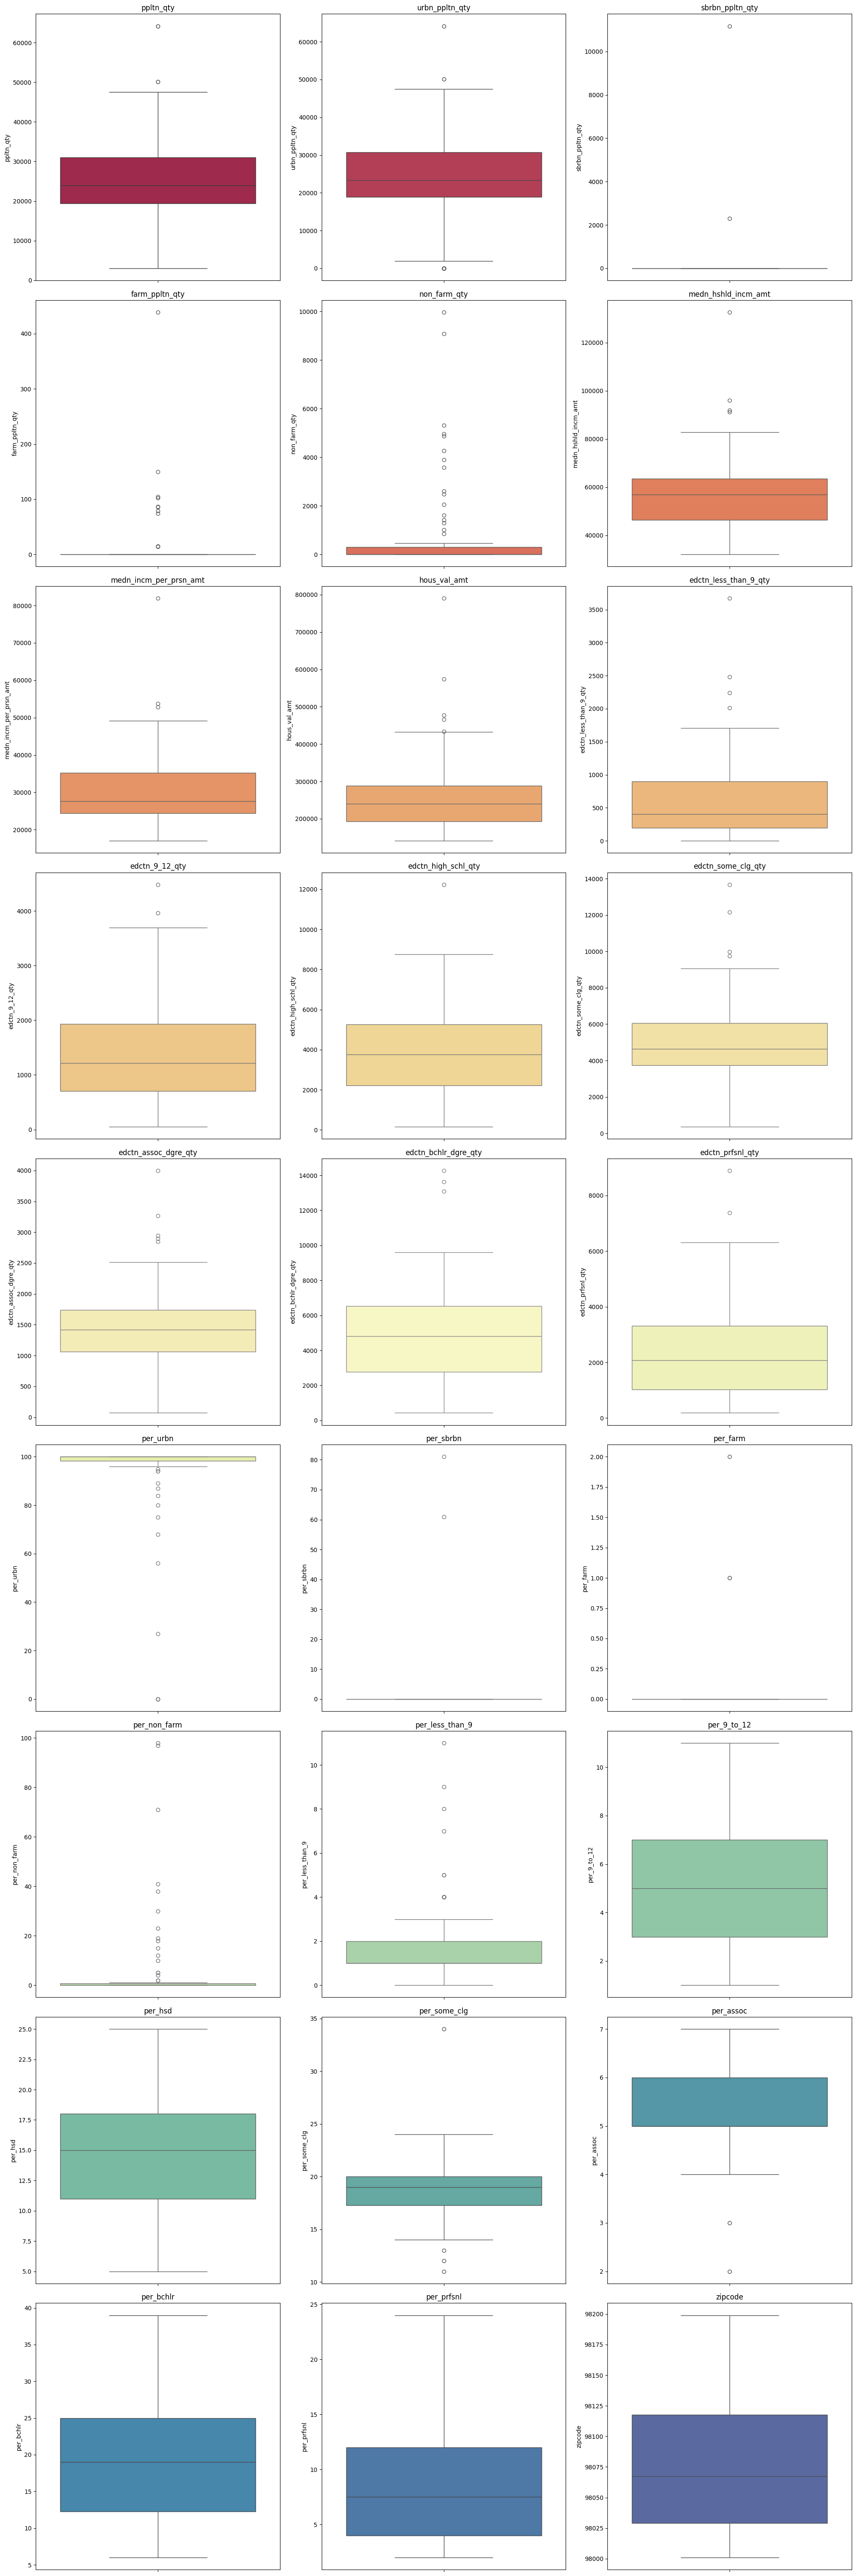

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Define the figure size and grid layout for plotting boxplots of all features
plt.figure(figsize=(20, 60))

# Number of columns for the grid
n_cols = 3

# Calculate the total number of rows needed
n_rows = (len(data.columns) + n_cols - 1) // n_cols

# Generate a color palette with a sufficient number of colors
colors = sns.color_palette("Spectral", n_colors=len(data.columns))

# Loop through all the columns and create a subplot for each feature
for i, column in enumerate(data.columns):
    plt.subplot(n_rows, n_cols, i+1)
    # Use the 'i'th color from the palette
    sns.boxplot(y=data[column], color=colors[i])
    plt.title(column)

plt.tight_layout()
plt.show()


## Merge the KC House Data with Zipcode Dataset

In [43]:
# Assuming your property dataset is loaded into a DataFrame named property_data
# property_data = pd.read_csv('path_to_your_property_data.csv')

# Merge the datasets on the 'zipcode' column
df_merged = pd.merge(df_kc_house_data, df_zipcode, on='zipcode', how='left').drop(['zipcode'], axis=1)

# Drop 'date' and 'id' columns
df_merged = df_merged.drop(['date','id'], axis=1)

# Display the first few rows of the merged dataset to verify the merge
df_merged.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  per_sbrbn  per_farm  per_non_farm  \
0     0          3      7  ...        0.0       0.0           0.0   
1     0          3      7  ...        0.0       0.0           0.0   
2     0          3      6  ...        0.0       0.0           0.0   
3     0          5      7  ...        0.0       0.0           0.0   
4     0          3      8  ...        0.0       0.0           0.0   

   per_less_than_9  per_9_to_12  per_hsd  per_some_clg  per_assoc  per_bchlr  \
0              4.0          8.0     20.0          21.0        5.0       12.0   
1              2.0          5.0     15.0          20.0        5.0       20.0   
2              1.0          4.0     13.0          20.0        6.0       19.0   
3              1.0          3.0     13.0          20.0        7.0       25.0   
4              1.0          5.0     15.0          19.0        5.0       19.0   

   per_prfsnl  
0         4.0  
1        12.0  
2         9.0  
3        12.0  
4         7.5  

[5 rows x 46 columns]

In [44]:
df_merged.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'property_age',
       'yrs_since_last_improvement', 'ppltn_qty', 'urbn_ppltn_qty',
       'sbrbn_ppltn_qty', 'farm_ppltn_qty', 'non_farm_qty',
       'medn_hshld_incm_amt', 'medn_incm_per_prsn_amt', 'hous_val_amt',
       'edctn_less_than_9_qty', 'edctn_9_12_qty', 'edctn_high_schl_qty',
       'edctn_some_clg_qty', 'edctn_assoc_dgre_qty', 'edctn_bchlr_dgre_qty',
       'edctn_prfsnl_qty', 'per_urbn', 'per_sbrbn', 'per_farm', 'per_non_farm',
       'per_less_than_9', 'per_9_to_12', 'per_hsd', 'per_some_clg',
       'per_assoc', 'per_bchlr', 'per_prfsnl'],
      dtype='object')

In [45]:
df_merged.to_csv('../data/merged_data.csv', index=False)

In [46]:
df_merged.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...     per_sbrbn      per_farm  per_non_farm  per_less_than_9  \
count  ...  21613.000000  21613.000000  21613.000000     21613.000000   
mean   ...      1.703188      0.049137      4.622542         1.836996   
std    ...     10.842697      0.275455     13.241714         2.156718   
min    ...      0.000000      0.000000      0.000000         0.000000   
25%    ...      0.000000      0.000000      0.000000         1.000000   
50%    ...      0.000000      0.000000      0.000000         1.000000   
75%    ...      0.000000      0.000000      0.000000         2.000000   
max    ...     81.000000      2.000000     98.000000        11.000000   

        per_9_to_12       per_hsd  per_some_clg     per_assoc     per_bchlr  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       5.077638     14.394392     18.678295      5.131634     19.413640   
std        2.475250      4.437998      2.789687      0.780764      7.048811   
min        1.000000      5.000000     11.000000      2.000000      6.000000   
25%        3.000000     11.000000     17.000000      5.000000     13.000000   
50%        5.000000     15.000000     19.000000      5.000000     19.000000   
75%        7.000000     17.000000     20.000000      6.000000     25.000000   
max       11.000000     25.000000     34.000000      7.000000     39.000000   

         per_prfsnl  
count  21613.000000  
mean       8.838754  
std        5.094015  
min        2.000000  
25%        4.000000  
50%        7.500000  
75%       12.000000  
max       24.000000  

[8 rows x 46 columns]

### Correlation Analysis

Here are some key points from the analysis:

- **Heatmap Overview**: The heatmap shows how each variable is related to the others, with colors indicating the strength and direction of the correlation. Warmer colors (e.g., red) indicate a positive correlation, while cooler colors (e.g., blue) suggest a negative correlation.

- **High Correlations**: Look for areas in the heatmap with distinctly warm or cool colors as these indicate strong correlations. Strong positive correlations might exist between features such as `sqft_living` and `bathrooms` or `grade`, suggesting these features move together in the same direction.

- **Price Correlations**: Correlations between `price` and other features could be of particular interest. Features with stronger positive correlations to `price` might include `sqft_living`, `grade`, and perhaps `bathrooms`, indicating that larger, higher-quality homes tend to have higher prices.

- **Low or Negative Correlations**: Features with low or negative correlations with `price` might include indicators not directly related to the physical attributes or quality of the property, possibly demographic data or other external factors. These features may have less impact on the price or could inversely affect it.

- **Insights for Further Analysis**: The heatmap can guide further statistical analysis or modeling work. For instance, features with strong correlations to `price` might be good predictors in a regression model for real estate prices.

Given the large number of features, a more detailed analysis might focus on a subset of highly correlated features, especially if the goal is predictive modeling or deeper insights into specific relationships.


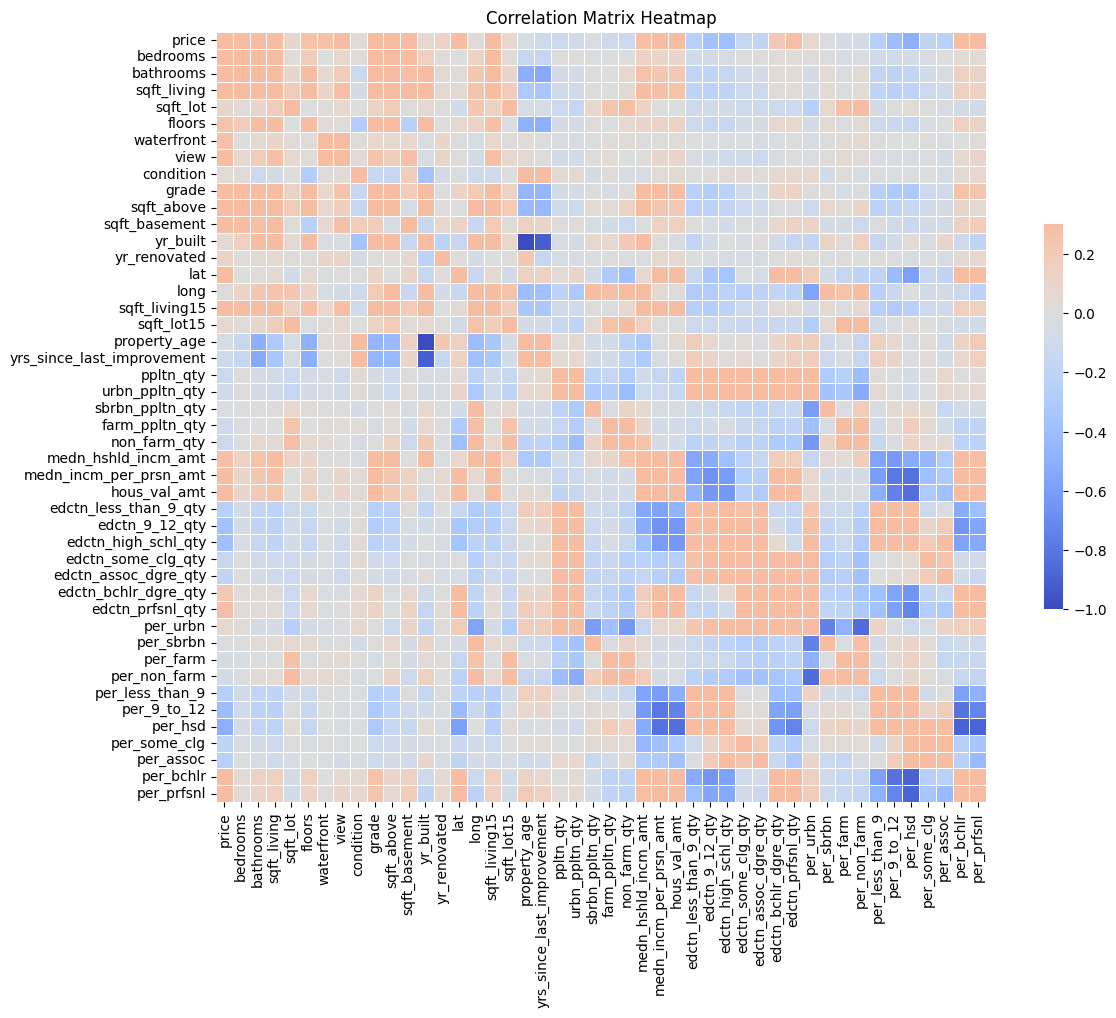

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df_merged.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()

#### Highly Correlated Features

The analysis identified the following features as being highly correlated with `price`, with correlation coefficients above 0.5:

- `sqft_living`
- `grade`
- `sqft_above`
- `sqft_living15`
- `hous_val_amt`
- `medn_incm_per_prsn_amt`
- `bathrooms`
- `per_prfsnl`

These features indicate that the size of the living space (`sqft_living`, `sqft_above`, `sqft_living15`), the overall grade of the house, and aspects related to the socio-economic status of the area (like `hous_val_amt`, `medn_incm_per_prsn_amt`, and `per_prfsnl`) are strongly associated with the price of a house. Additionally, the number of bathrooms is also significantly correlated with price.

For further predictive modeling or detailed analysis, focusing on these features could provide insightful results regarding the factors that influence real estate pricing. Here's an example of how you might start a regression analysis using these features:


In [48]:
# To focus on highly correlated features, especially with respect to 'price',
# we'll first identify features that have a high correlation with 'price'.
# We'll set an arbitrary threshold for high correlation. For this analysis,
# let's consider features with a correlation coefficient above 0.5 with 'price' to be highly correlated.

# Identify highly correlated features with 'price'
high_corr_features = corr['price'].abs().sort_values(ascending=False)

# Filter out features with a correlation greater than 0.5 with price
high_corr_features = high_corr_features[(high_corr_features > 0.5) | (high_corr_features < 0.5)].index.tolist()

# Display the list of highly correlated features with 'price'
high_corr_features


['price',
 'sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'hous_val_amt',
 'medn_incm_per_prsn_amt',
 'bathrooms',
 'per_prfsnl',
 'per_hsd',
 'per_bchlr',
 'per_9_to_12',
 'view',
 'edctn_high_schl_qty',
 'edctn_9_12_qty',
 'sqft_basement',
 'bedrooms',
 'lat',
 'edctn_prfsnl_qty',
 'medn_hshld_incm_amt',
 'waterfront',
 'floors',
 'per_less_than_9',
 'edctn_less_than_9_qty',
 'per_assoc',
 'edctn_bchlr_dgre_qty',
 'edctn_assoc_dgre_qty',
 'per_some_clg',
 'edctn_some_clg_qty',
 'yr_renovated',
 'ppltn_qty',
 'non_farm_qty',
 'yrs_since_last_improvement',
 'farm_ppltn_qty',
 'urbn_ppltn_qty',
 'sqft_lot',
 'sqft_lot15',
 'per_non_farm',
 'per_urbn',
 'per_farm',
 'property_age',
 'yr_built',
 'condition',
 'sbrbn_ppltn_qty',
 'per_sbrbn',
 'long']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = df_merged

# Selecting the dataset with only the highly correlated features, excluding 'price'
X = df[high_corr_features[1:]]  # Exclude 'price' itself
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 32252956892.00473
